In [1]:
library("ggplot2")

In [2]:
library("tidyverse")
library("ggsci")
library(gghighlight)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
theme_set(theme_bw())

In [4]:
library(repr)
options(repr.plot.width=15, repr.plot.height=10)

# Plot settings

In [5]:
path = "../figures/"

In [6]:
FONT = "Helvetica"
FONTSIZE = 12

In [7]:
THEME = theme(
      axis.text.x = element_text(family=FONT, size = FONTSIZE/.pt),
      axis.text.y = element_text(family=FONT, size = FONTSIZE/.pt),
      text=element_text(family=FONT, size = FONTSIZE/.pt))

# Pubmed


#### Go to PubMed and search for "breast cancer gene signature"
https://pubmed.ncbi.nlm.nih.gov/?term=breast+cancer+gene+signature
Than download the scv file.

In [8]:
pal = pal_npg("nrc", alpha = 0.7)(9)

In [141]:
counts = read.csv("../data_for_figures/PubMed_Timeline_Results_by_Year.csv", header=FALSE)

colnames(counts) = c("Year", "Occurences")
counts$Year = as.numeric(counts$Year)
counts$Occurences = as.numeric(counts$Occurences)
counts = counts  %>% map_df(rev)
counts = counts[1:34,]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [142]:
c(rgb(0, 101, 165, maxColorValue=255))

[1] "#0065A5"

Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


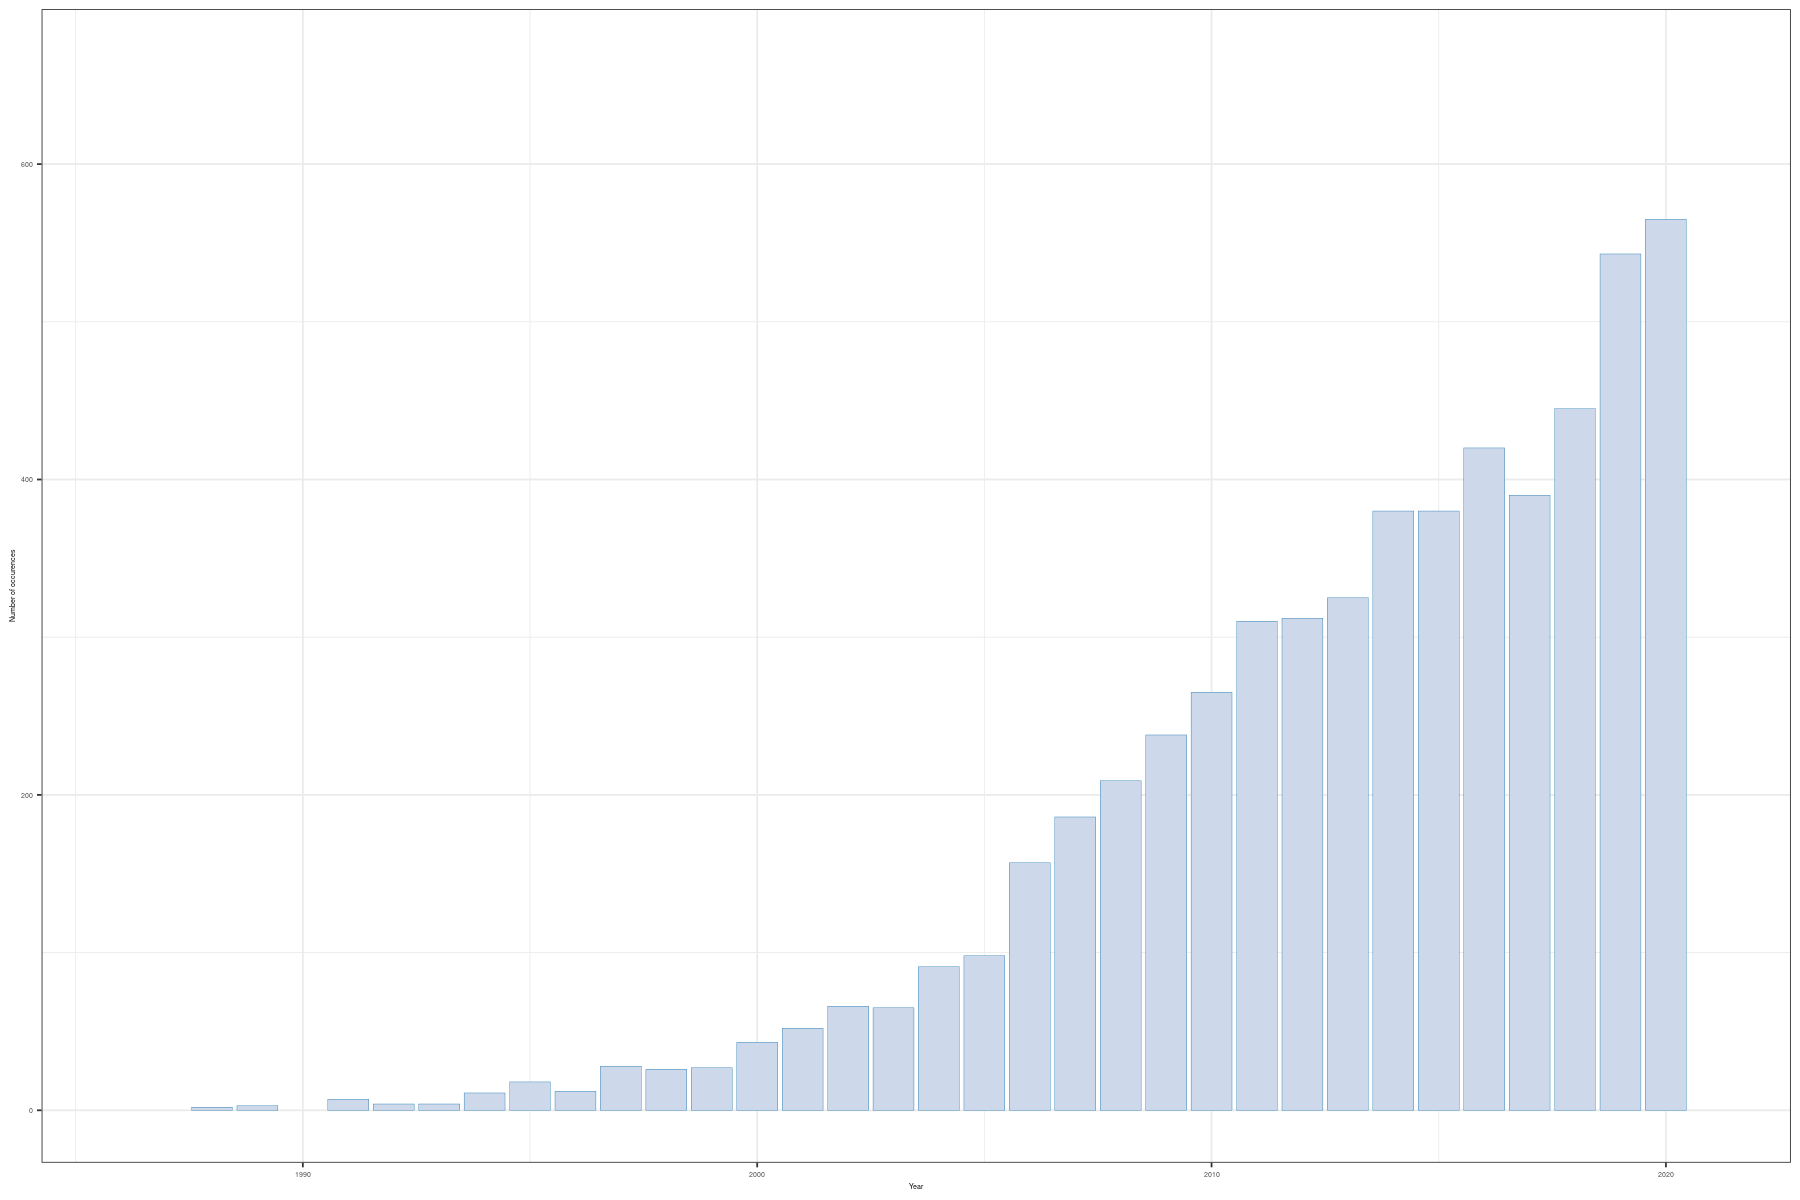

In [143]:
ggplot(data=counts, aes(x=Year, y=Occurences)) + 
    geom_bar(stat="identity", color=rgb(0, 101, 165, maxColorValue=255), 
             size=0.1,
             fill=rgb(205, 217, 235, maxColorValue=255)) +
    ylab("Number of occurences") +
    xlim(1986,2021) +
    THEME

In [144]:
ggsave(filename = "num_of_occurences.tiff", path = path, width = 8.7, height = 8.7*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "num_of_occurences.png",  path = path, width = 8.7, height = 8.7*(2/3), units = "cm", device='png',  dpi=700)

Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


# MNIST simulate survival time figure

In [1]:
PC = read.csv("../data/mnist//pcs.txt")
M0 = read.csv("../data/mnist//mnist0.txt")

In [2]:
t_surv = function(pc1, pc2){
    MDS = 10
    pc1 = pc1/max(pc1)
    pc2 = pc2/max(pc2)
    MDS*exp(0.6*(pc1+pc2))
}

In [11]:
PC = tibble(PC)

In [12]:
PC = PC  %>% 
        mutate(Time = t_surv(PC1, PC2))

In [13]:
median(PC$Time)

[1] 10.05997

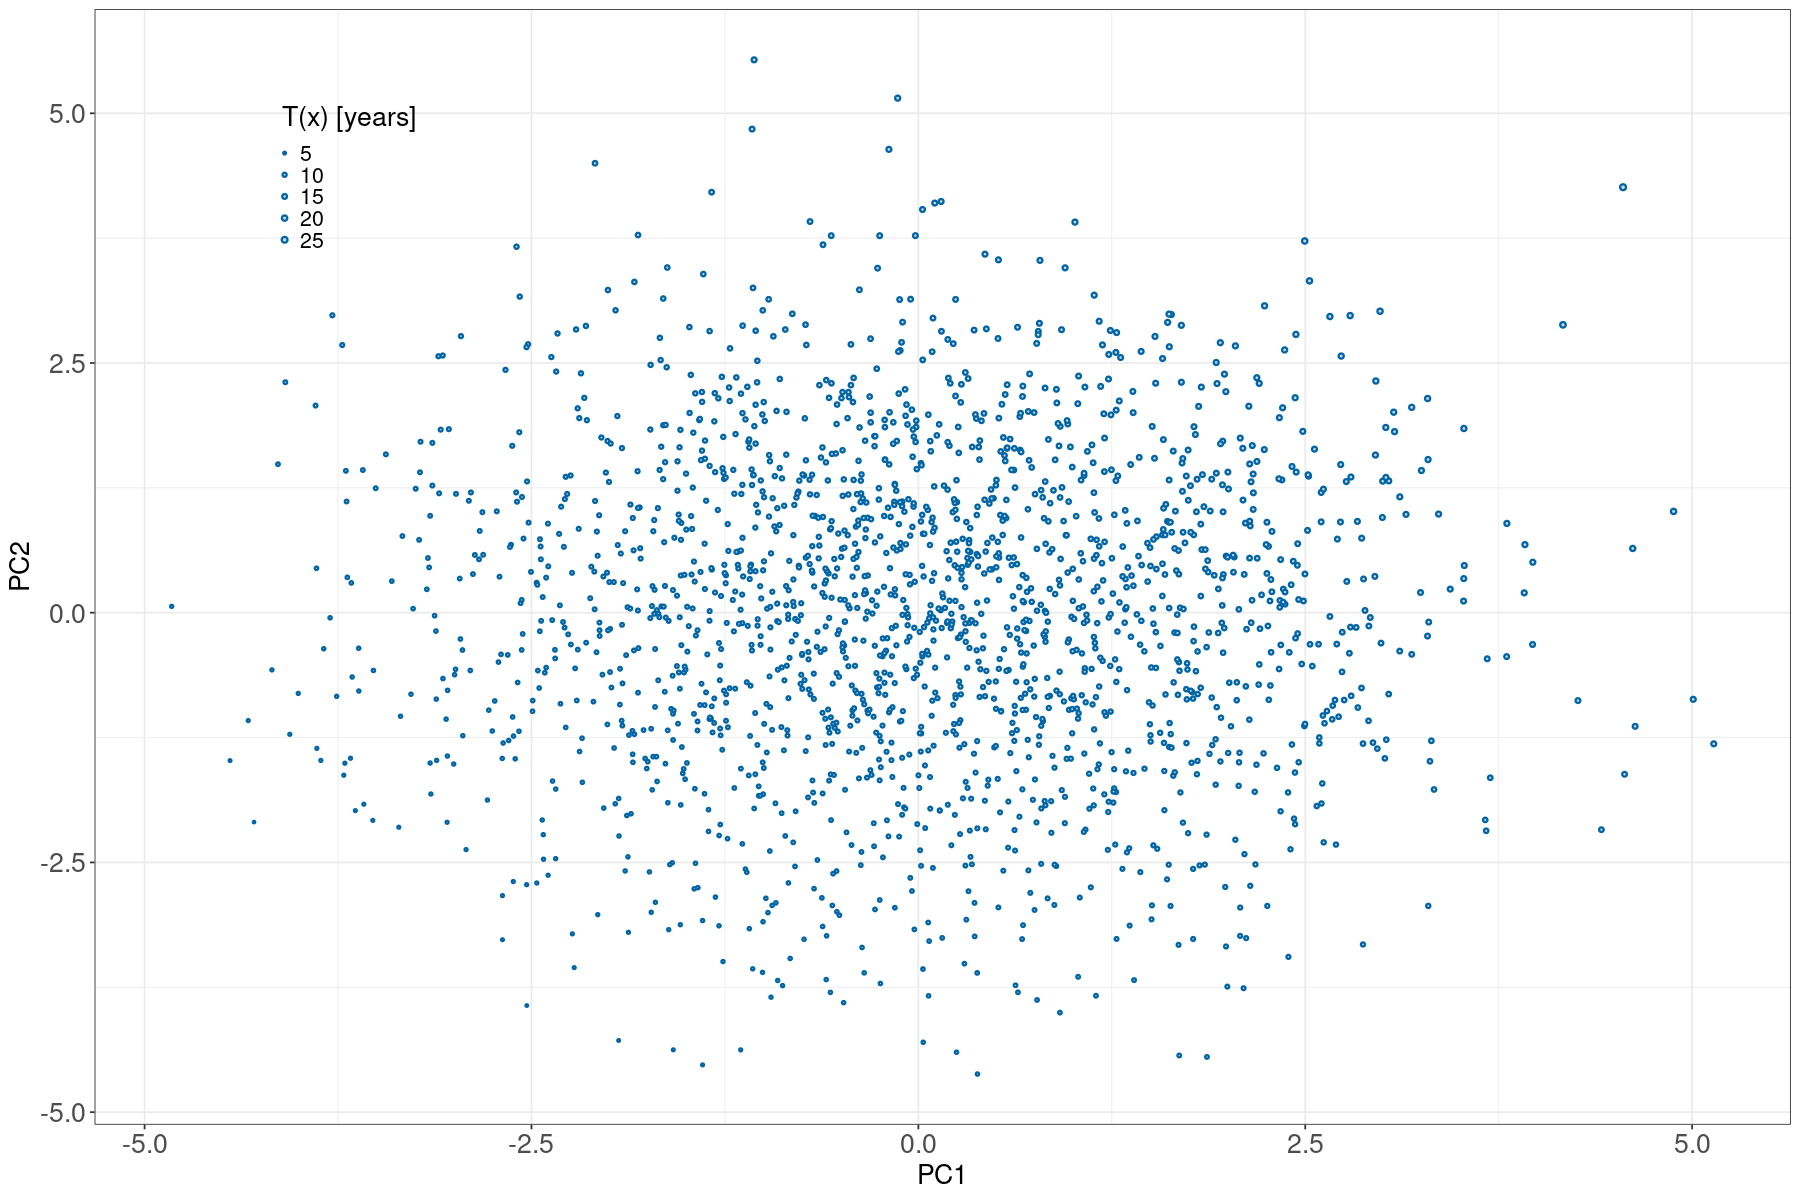

In [51]:
SP = ggplot(PC, aes(x=PC1, y=PC2, z=Time, size=Time, color=Time, fill = Time)) +
      geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 stroke = 1.0
                ) + 
scale_size_continuous(range = c(0, 1)) +
        xlab("PC1") + 
        ylab("PC2") + 
#         xlim(-10,5) +
        labs(size = "T(x) [years]") +
        theme(legend.position = c(0.15, 0.85),
        #legend.title =   element_text(size = 6), 
        #legend.text = element_text(size = 5),
        legend.key.size =  unit(0.1, "points"),
        legend.background=element_rect(fill = alpha("white", 0.0)),
        #legend.key.width = unit(8, "points"),
        #legend.direction = "vertical",
        #legend.title.align=0.0
             ) +
        #THEME
    theme(
      axis.text.x = element_text(family=FONT, size = 16),
      axis.text.y = element_text(family=FONT, size = 16),
      text=element_text(family=FONT,          size = 16))
SP

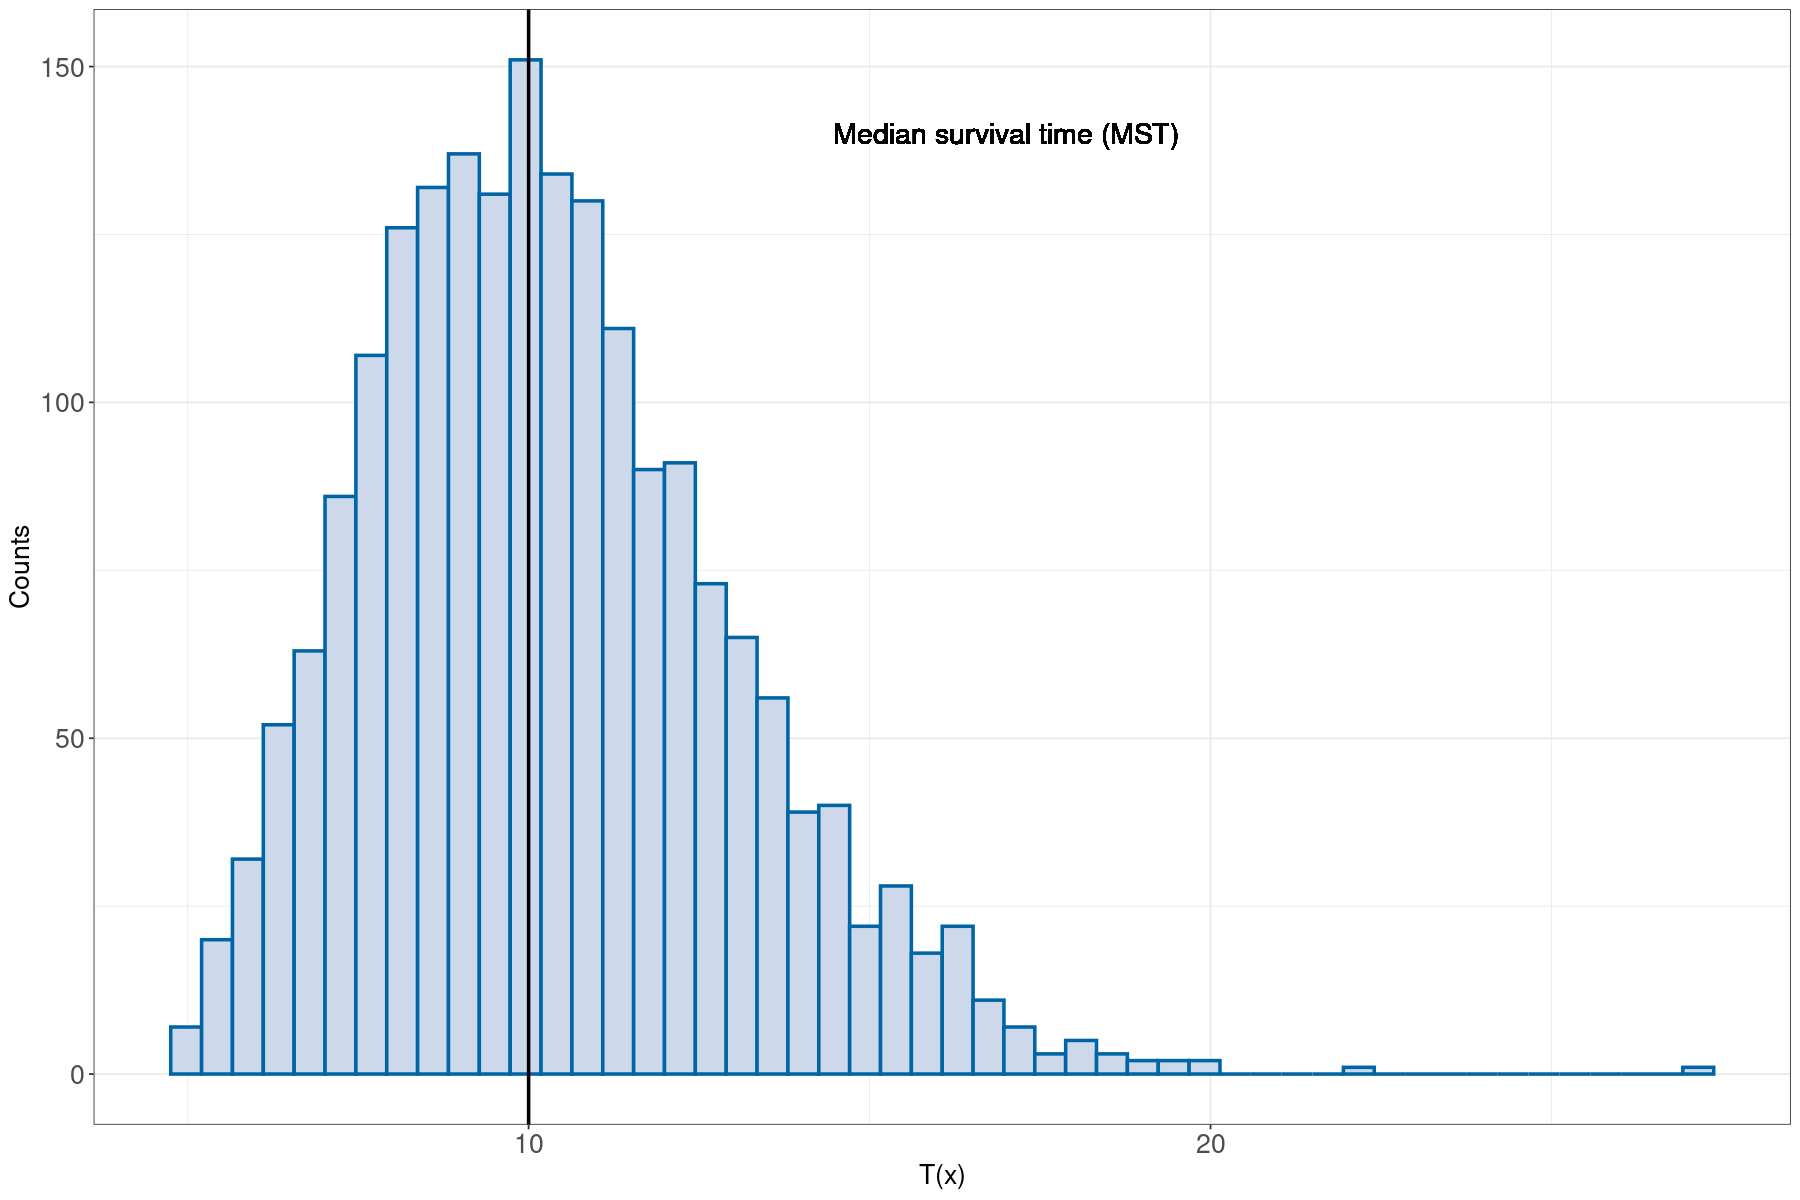

In [53]:
HIST = ggplot(data=PC, aes(x=Time)) + 
    geom_histogram(color=rgb(0, 101, 165, maxColorValue=255), 
             size=1,
             fill=rgb(205, 217, 235, maxColorValue=255),
                  bins=50) +
    geom_vline(xintercept=10, size=1)+
    geom_text(x=17, y=140, label="Median survival time (MST)", size=6, family=FONT)+
    ylab("Counts") +
    xlab("T(x)") + theme(
      axis.text.x = element_text(family=FONT, size = 16),
      axis.text.y = element_text(family=FONT, size = 16),
      text=element_text(family=FONT,          size = 16))
#     xlim(1986,2021) +
   # THEME
HIST

In [54]:
# ggsave(filename = "mnist_sp.png", path = path, device='png')
ggsave(filename = "mnist_hist.png", path = path, device='png')

Saving 6.67 x 6.67 in image



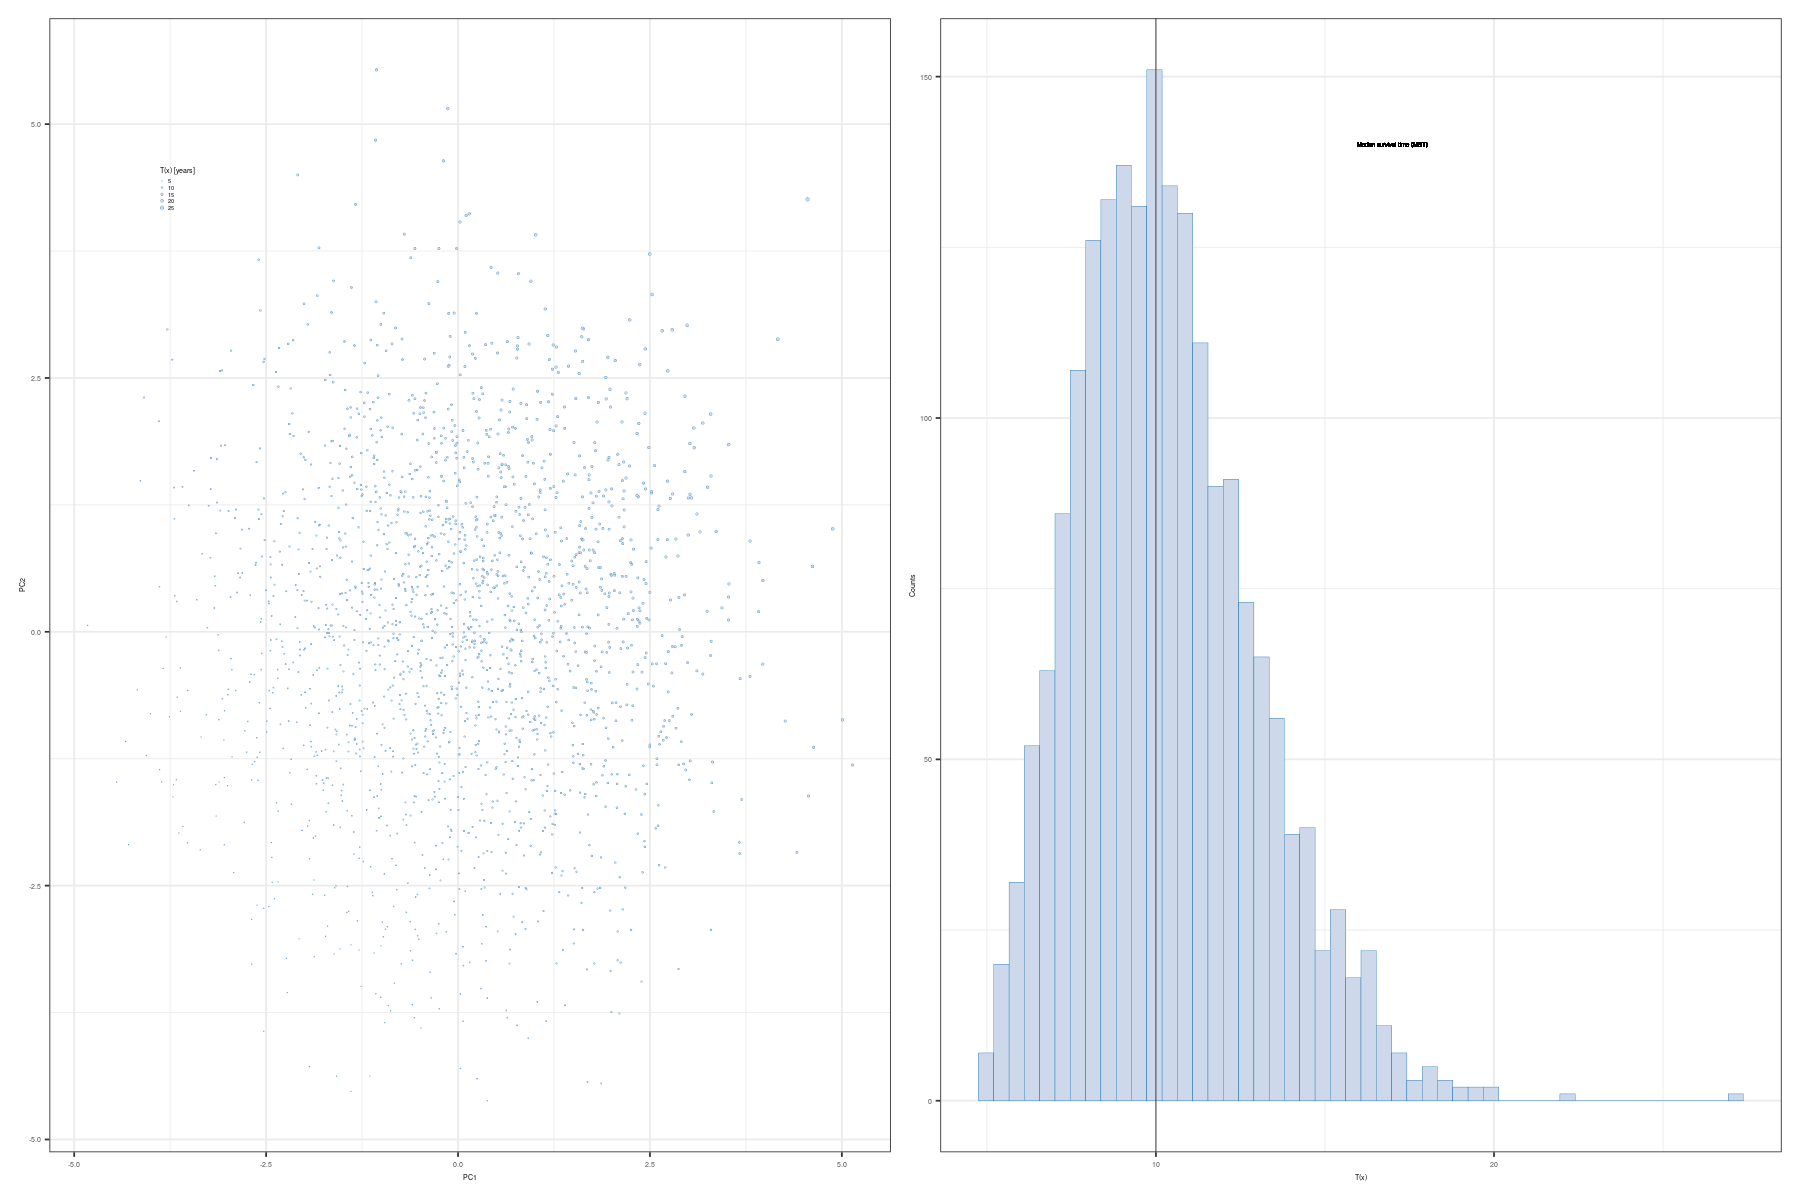

In [378]:
STIME = SP+HIST
STIME

In [153]:
ggsave(filename = "mnist_pc.tiff", path = path, width = 8.7, height = 8.7*(1.5/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "mnist_pc.png",  path = path, width = 8.7, height = 8.7*(1.5/3), units = "cm", device='png',  dpi=700)

In [702]:
#I = M0  %>% 
#    gather(pixel, value, -X)  %>% 
#    tidyr::extract(pixel, "pixel", "(\\d+)", convert = TRUE) %>%
#    mutate(x = pixel %% 28,
#           y = 28 - pixel %/% 28)
#
#Ms = vector("list", length = dim(M0)[1])
#
#
#for (i in 1:10){
#Ms[[i]] = I %>%
#  filter(X == M0$X[[i]]) %>%
#  ggplot(aes(x, y, fill = value)) +
#  geom_tile() +
#  coord_fixed() +
#  scale_fill_gradient2(low = "grey", mid = "white", high = "black") +
#  guides(fill = guide_colourbar(label = FALSE,
#                                ticks = FALSE))+
##   labs(x="", y="", title=paste0(Cs[[i]])) +
#  theme(legend.position = "none") +
#  THEME+
#  theme(plot.title = element_text(hjust = 0.5),
#        axis.title.x=element_blank(),
#        axis.text.x=element_blank(),
#        axis.ticks.x=element_blank(),
#        axis.title.y=element_blank(),
#        axis.text.y=element_blank(),
#        axis.ticks.y=element_blank())}

In [360]:
#dl=0.2
#dt=0.2
#
#l=0
#b=0.8
#r=0.2
#t=1.0
#
#ie = function(p,x,y){
#    dx=0.2
#    dy=0.2
#    inset_element(p, left = x, bottom = y-dy, right = x+dx, top = y)
#}
#
#P = ggplot() + theme_void() 
#    
#P + 
#ie(Ms[[8]], 0.0, 0.2)+
#ie(Ms[[6]], 0.0, 0.4)+
#ie(Ms[[5]], 0.0, 0.6)+
#ie(Ms[[3]], 0.0, 0.8)+
#inset_element(Ms[[1]], left = l, bottom = t-dt, right = l+dl, top = t)


# MNIST

In [9]:
C_indices = read.csv("../data/mnist//c_indices.txt")

In [10]:
dim(C_indices)
C_indices[1:5,1:5]

[1] 101 102

,X,Entropy,N_0,N_1,N_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.2073288,0.9999960,0.9999820,0.9999895
2,0.01,0.2189350,0.9863507,0.9863492,0.9854247
3,0.02,0.2304496,0.9826193,0.9827709,0.9821891
4,0.03,0.2419240,0.9783472,0.9774862,0.9765208
5,0.04,0.2532962,0.9754697,0.9783147,0.9760735


In [11]:
C_mean = apply(C_indices[,2:dim(C_indices)[1]], 1, mean)
C_median = apply(C_indices[,2:dim(C_indices)[1]], 1, median)
C_std  = apply(C_indices[,2:dim(C_indices)[1]], 1, sd)
C_se_median = 1.2533 * C_std

In [12]:
C = tibble(C_indices$Entropy, C_indices$X*100, C_median, C_se_median)
colnames(C) = c("Entropy", "Noise", "Median", "Std_median_error")

In [13]:
head(C)

Entropy,Noise,Median,Std_median_error
<dbl>,<dbl>,<dbl>,<dbl>
0.2073288,0,0.9999890,0.09934382
0.2189350,1,0.9873297,0.09636749
0.2304496,2,0.9821848,0.11032509
0.2419240,3,0.9783472,0.10829444
0.2532962,4,0.9751396,0.10658153
0.2645320,5,0.9722016,0.11769590


### C-Index

In [14]:
err = function(l){
    for (e in l){
        
    }
}

In [15]:
P = ggplot(C, aes(x=Noise, y=C_median)) + 
  geom_line(size=1, alpha=0.8, color=rgb(0, 101, 165, maxColorValue=255)) +
   geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=2,
                 stroke = 0.5
                )+
  xlab("Noise [%]")+
  ylab("Median C-Index")+
  expand_limits(y = c(0.5, 1.2)) +
  geom_errorbar(aes(ymin=C_median-Std_median_error, 
                    ymax= ifelse((C_median+Std_median_error)>1.0, 1.0, (C_median+Std_median_error)),
                   ), width=.01,
                color=rgb(0, 101, 165, maxColorValue=255),
                 position=position_dodge(0.05), alpha=0.5) + 
  theme(
      axis.text.x = element_text(family=FONT, size = 26/.pt),
      axis.text.y = element_text(family=FONT, size = 26/.pt),
      text=element_text(family=FONT,          size = 26/.pt))
#P

### Entropy

In [16]:
P_entropy = ggplot(C, aes(x=Entropy, y=C_median)) + 
  geom_line(size=1, alpha=0.6) +
  geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=1,
                 stroke = 0.5
                )+
  xlab("Normalized Shannon Entropy")+
  ylab("Median C-Index")+
  #expand_limits(y = c(0.5, 1.2)) +
  geom_errorbar(aes(ymin=C_median-Std_median_error, 
                    ymax= ifelse((C_median+Std_median_error)>1.0, 1.0, (C_median+Std_median_error)),
                   ), width=.005,
                color=rgb(0, 101, 165, maxColorValue=255),
                 position=position_dodge(0.05), alpha=0.5) +  
    theme(
      axis.text.x = element_text(family=FONT, size = 26/.pt),
      axis.text.y = element_text(family=FONT, size = 26/.pt),
      text=element_text(family=FONT,          size = 26/.pt))+
theme(
    panel.background = element_rect(fill = "transparent"), # bg of the panel
    plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
    panel.grid.major = element_blank(), # get rid of major grid
    panel.grid.minor = element_blank(), # get rid of minor grid
    legend.background = element_rect(fill = "transparent"), # get rid of legend bg
    legend.box.background = element_rect(fill = "transparent") # get rid of legend panel bg
  )
#P_entropy

In [17]:
Images = read.csv("../data/mnist//noisy_images.txt")

In [18]:
#D = tibble(Images[Images$X==1.0,2:dim(Images)[2]])
#D = as_tibble(cbind(nms = names(D), t(D)) )
#colnames(D) = c("Pixel", "Image")

### Noisy MNIST Images

In [19]:
dim(Images)

[1] 101 786

In [20]:
I = Images  %>% 
    rename(C_Index = X)  %>% 
    mutate(Index = row_number())  %>% 
    gather(pixel, value, -C_Index, -Index, -Noise)  %>% 
    tidyr::extract(pixel, "pixel", "(\\d+)", convert = TRUE) %>%
    mutate(x = pixel %% 28,
           y = 28 - pixel %/% 28)

In [21]:
head(I)
dim(I)

,C_Index,Noise,Index,pixel,value,x,y
,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,1.00,0.00,1,0,0,0,28
2,0.99,0.01,2,0,0,0,28
3,0.98,0.02,3,0,0,0,28
4,0.98,0.03,4,0,0,0,28
5,0.98,0.04,5,0,0,0,28
6,0.97,0.05,6,0,0,0,28


[1] 79184     7

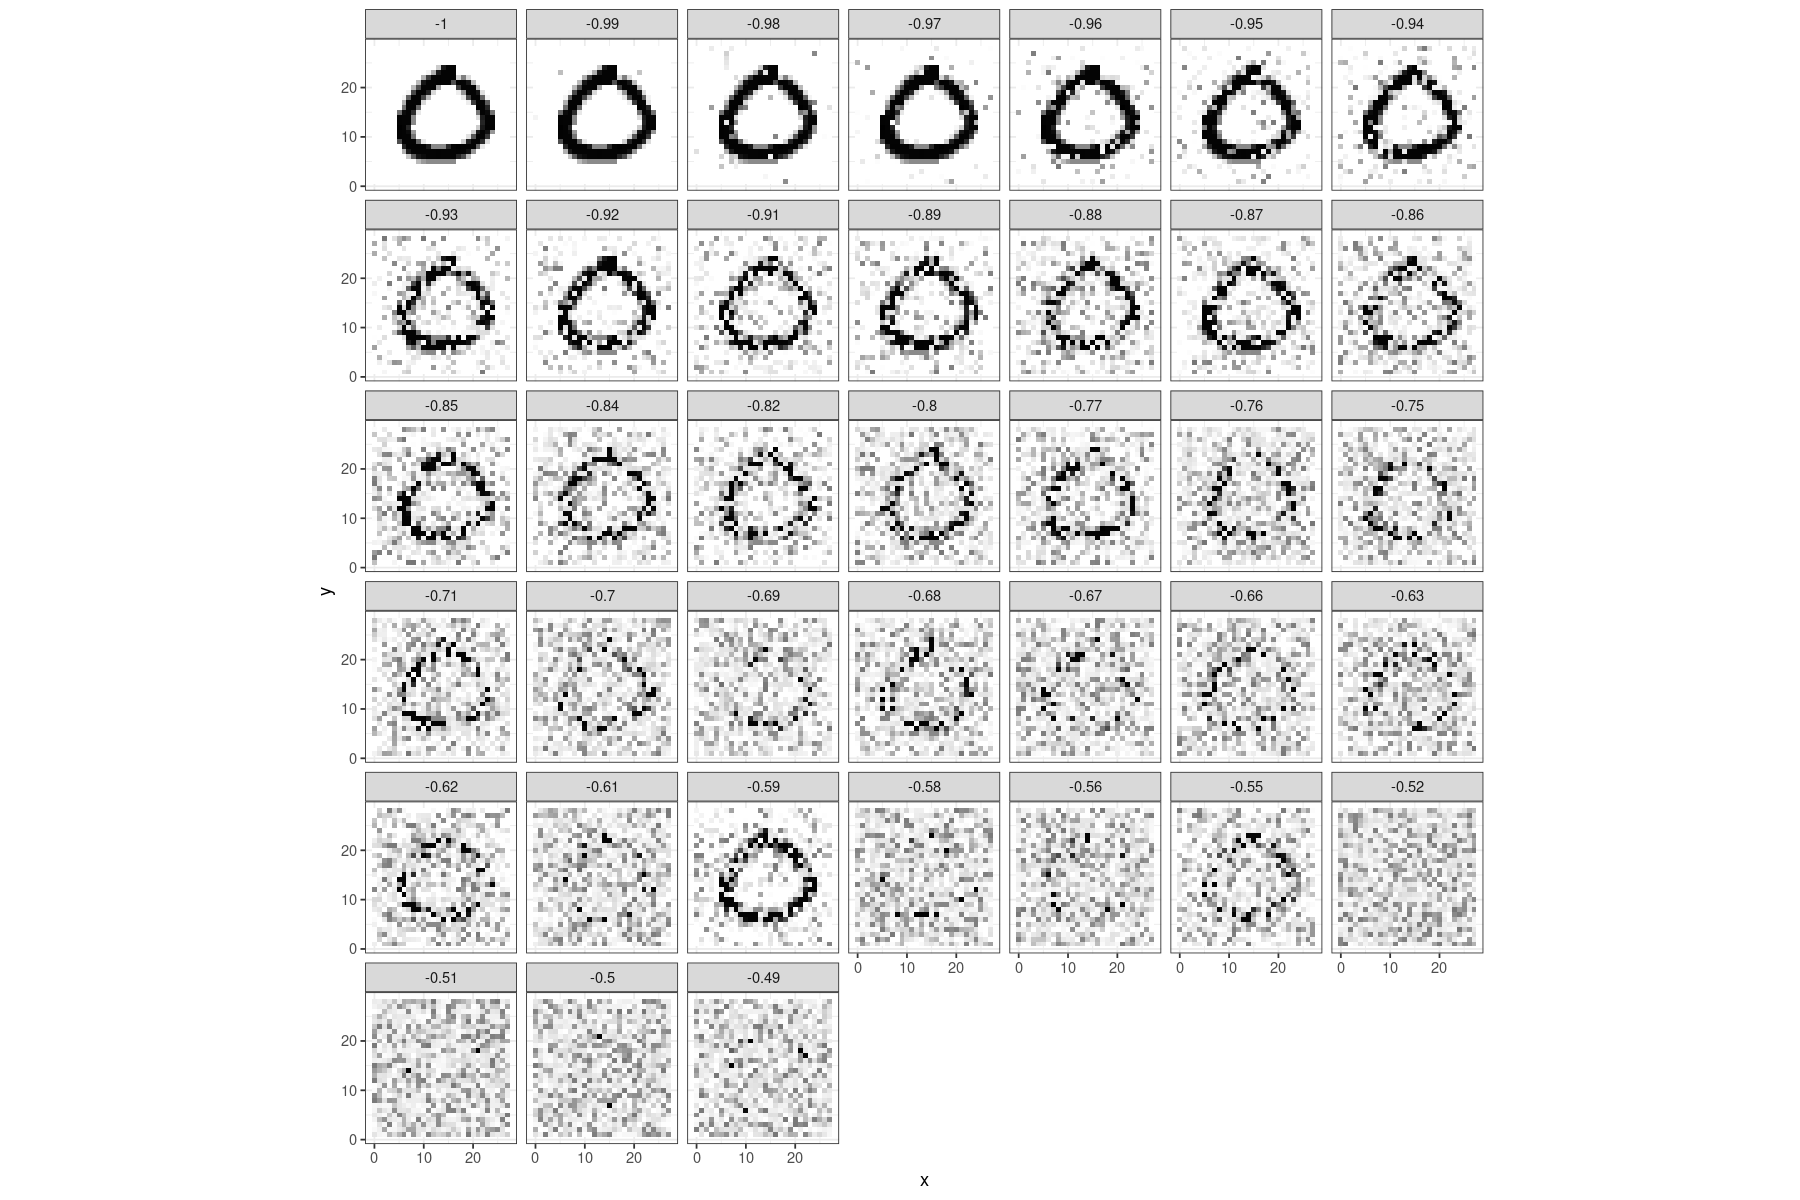

In [22]:
Facet = I %>%
#   filter(Index %in% c(1, 28, 63, 74, 86, 99)) %>%
#  filter(Noise %in% c(0.5,0.5)) %>%
  ggplot(aes(x, y, fill = value)) +
  geom_tile() +
  coord_fixed() +
  scale_fill_gradient2(low = "grey", mid = "white", high = "black") +
  guides(fill = guide_colourbar(label = FALSE,
                                ticks = FALSE))+
  theme(legend.position = "none") +
  facet_wrap(~ -C_Index) 
Facet

In [23]:
inds = c(1, 28, 38, 63, 74, 77, 86, 99)
Is = vector("list", length = length(inds))
Cs = vector("list", length = length(inds))

for (i in 1:length(inds)){
Cs[[i]] = unique(I$C_Index[I$Index==inds[[i]]])
Is[[i]] = I %>%
  filter(Index == inds[i]) %>%
  ggplot(aes(x, y, fill = value)) +
  geom_tile() +
  coord_fixed() +
  scale_fill_gradient2(low = "grey", mid = "white", high = "black") +
  guides(fill = guide_colourbar(label = FALSE,
                                ticks = FALSE))+
  labs(x="", y="", title=paste0(Cs[[i]])) +
  theme(legend.position = "none") +
  THEME+
  theme(plot.title = element_text(hjust = 0.5, size=26/.pt),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
  theme(
    panel.background = element_rect(fill = "transparent"), # bg of the panel
    plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
    panel.grid.major = element_blank(), # get rid of major grid
    panel.grid.minor = element_blank(), # get rid of minor grid
    legend.background = element_rect(fill = "transparent"), # get rid of legend bg
    legend.box.background = element_rect(fill = "transparent") # get rid of legend panel bg
  )
}

### Putting it all together

In [61]:
uu = 0.1

Warning message:
“position_dodge requires non-overlapping x intervals”


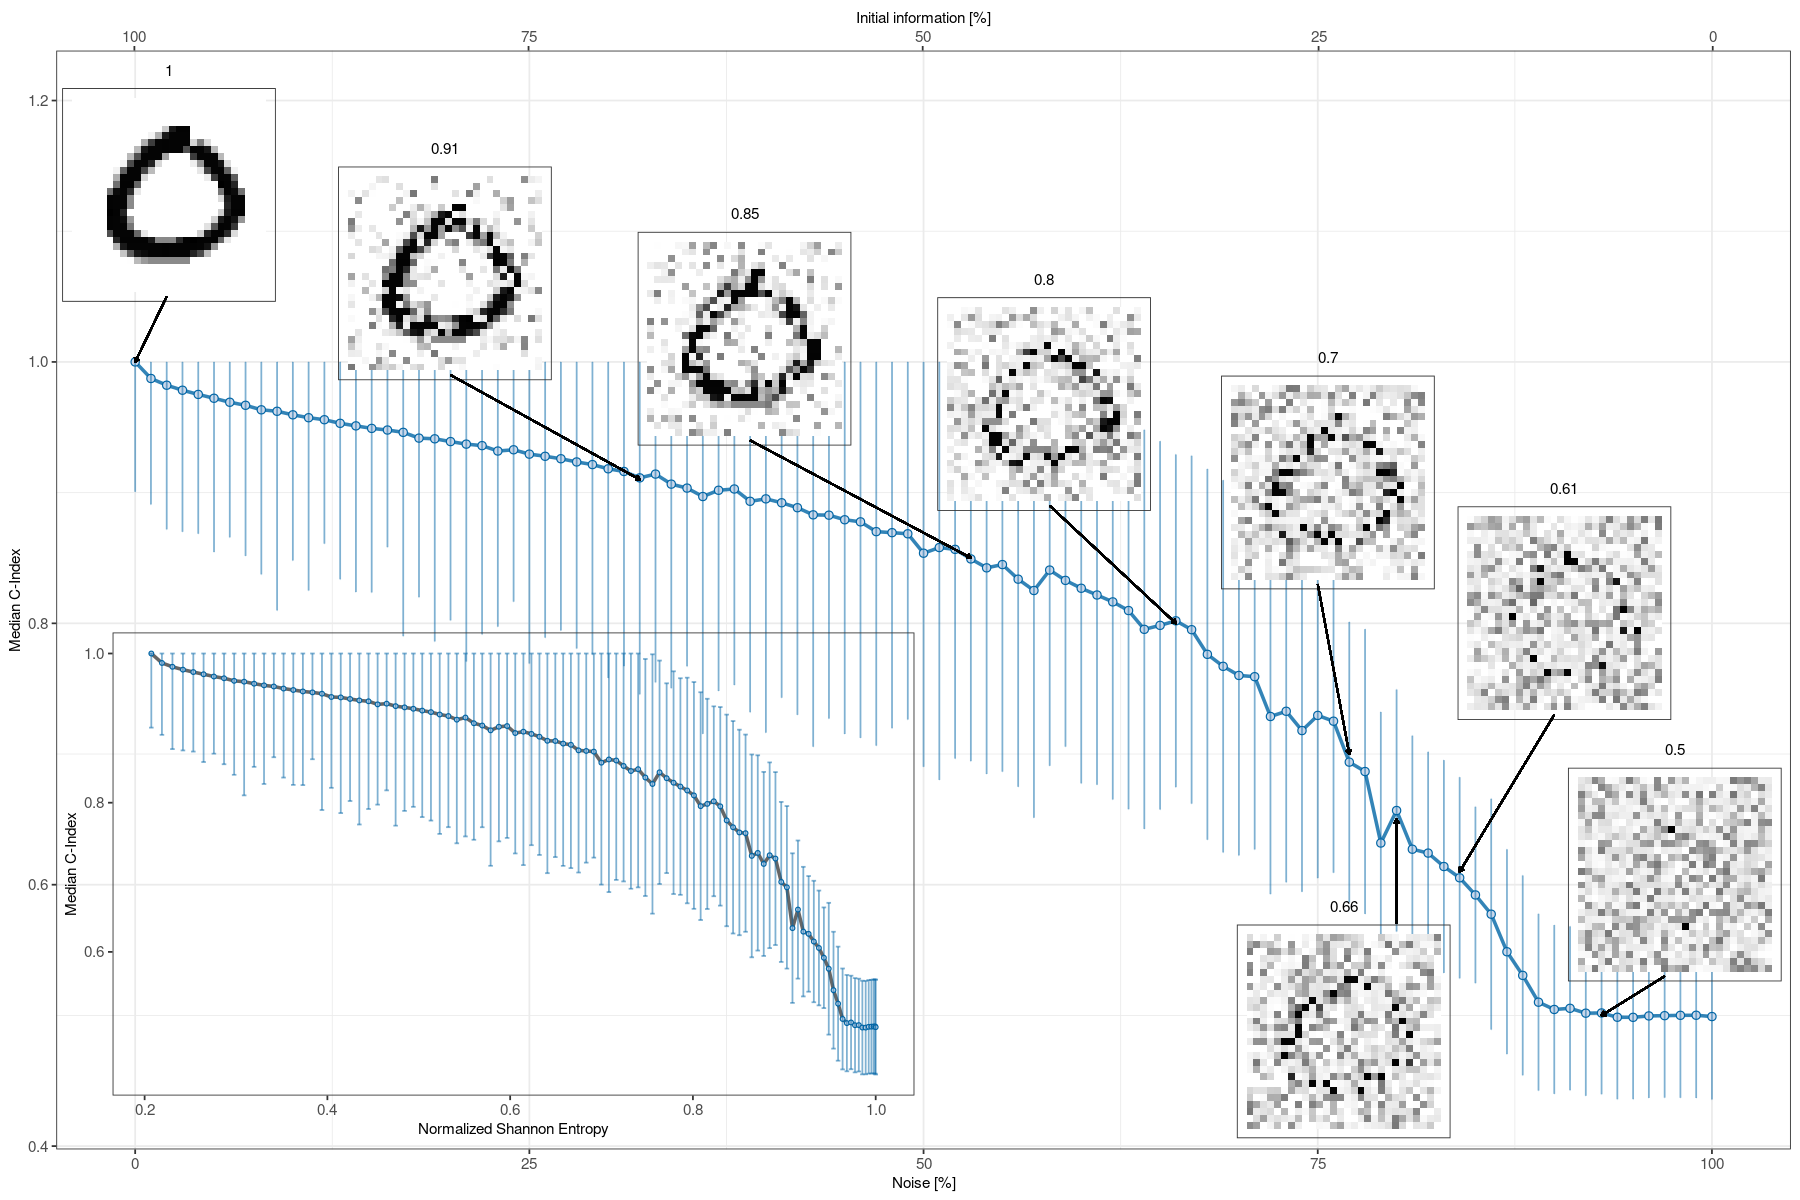

In [66]:
P1 = P + 
    annotation_custom(ggplotGrob(Is[[1]]), xmin = -5.5, xmax = 9.5,  ymin = 0.61+0.41, ymax = 0.61+0.64) +
    annotation_custom(ggplotGrob(Is[[2]]), xmin = 15-3, xmax = 30-3, ymin = 0.55+0.41, ymax = 0.55+0.64) +
    annotation_custom(ggplotGrob(Is[[3]]), xmin = 35-4, xmax = 50-4, ymin = 0.50+0.41, ymax = 0.50+0.64) +
    annotation_custom(ggplotGrob(Is[[4]]), xmin = 50+0, xmax = 65+0, ymin = 0.45+0.41, ymax = 0.45+0.64) +

    annotation_custom(ggplotGrob(Is[[5]]), xmin = 68+0, xmax = 83+0, ymin = 0.80, ymax = 0.80+0.23) +
    annotation_custom(ggplotGrob(Is[[6]]), xmin = 69+0, xmax = 84+0, ymin = 0.38, ymax = 0.38+0.23) +
    annotation_custom(ggplotGrob(Is[[7]]), xmin = 83+0, xmax = 98+0, ymin = 0.70, ymax = 0.70+0.23) +
    annotation_custom(ggplotGrob(Is[[8]]), xmin = 90+0, xmax = 105+0, ymin =0.50, ymax = 0.73) + 

    annotation_custom(ggplotGrob(P_entropy), xmin = -5, xmax = 50, ymin =0.40, ymax = 0.8) 
#    geom_text(x=1, y=1.16, label="C-Index:", family=FONT, size=7, fontface="plain")
dy = 0.01
P2 =
P1 +#geom_rect(aes(xmin=-1, xmax=1,ymin=1-dy, ymax=1+dy),       fill='green', alpha=.005) + 
    #geom_rect(aes(xmin=30, xmax=35,ymin=0.91-dy, ymax=0.91+dy),fill='green', alpha=.005) + 
    #geom_rect(aes(xmin=50, xmax=55,ymin=0.85-dy, ymax=0.85+dy),fill='green', alpha=.005) + 
    #geom_rect(aes(xmin=63, xmax=68,ymin=0.8-dy, ymax=0.8+dy),  fill='green', alpha=.005) + 
    #geom_rect(aes(xmin=76, xmax=79,ymin=0.7-dy, ymax=0.7+dy),  fill='red', alpha=.005) + 
    #geom_rect(aes(xmin=79, xmax=81,ymin=0.66-dy, ymax=0.66+dy),fill='red', alpha=.005) + 
    #geom_rect(aes(xmin=82, xmax=85,ymin=0.61-dy, ymax=0.61+dy),fill='red', alpha=.005) + 
    #geom_rect(aes(xmin=92, xmax=100,ymin=0.5-dy, ymax=0.5+dy), fill='red', alpha=.005) +
    geom_segment(aes(x = 2, y = 1.05, xend = 0, yend = 1), arrow = arrow(length = unit(uu, "cm"))) +
    geom_segment(aes(x = 20, y = 0.99, xend = 32, yend = 0.91), arrow = arrow(length = unit(uu, "cm"))) +
    geom_segment(aes(x = 39, y = 0.94, xend = 53, yend = 0.85), arrow = arrow(length = unit(uu, "cm"))) +
    geom_segment(aes(x = 58, y = 0.89, xend = 66, yend = 0.80), arrow = arrow(length = unit(uu, "cm"))) +
    geom_segment(aes(x = 75, y = 0.83, xend = 77, yend = 0.70), arrow = arrow(length = unit(uu, "cm"))) +
    geom_segment(aes(x = 90, y = 0.73, xend = 84, yend = 0.61), arrow = arrow(length = unit(uu, "cm"))) +
    geom_segment(aes(x = 97, y = 0.53, xend = 93, yend = 0.50), arrow = arrow(length = unit(uu, "cm"))) +
    geom_segment(aes(x = 80, y = 0.57, xend = 80, yend = 0.65), arrow = arrow(length = unit(uu, "cm"))) +


      theme(
      axis.text.x = element_text(family=FONT, size = 26/.pt),
      axis.text.y = element_text(family=FONT, size = 26/.pt),
      text=element_text(family=FONT,          size = 26/.pt))
P2 + scale_x_continuous(sec.axis = sec_axis(~  100 -. ,name = "Initial information [%]",))

In [67]:
ggsave(filename = "cindex_mnist.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "cindex_mnist.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

# Gene expressions

In [11]:
#export
library("ggsci")
library("ggridges")
library(stringr)
library(gghighlight)

In [12]:
library(patchwork)

## State-of-the-science

In [13]:
extract_algorithm_name = function(filename, modelname){
    str_match(filename, paste0(modelname, "_\\s*(.*?)\\s*.rds"))[2]
}

In [14]:
extract_algorithm_name_from_df = function(df){
    E = vector(mode="list", length = dim(df)[1])
    for (i in 1:dim(df)[1]){
        E[[i]] = extract_algorithm_name(df$file_name[[i]], df$model[[i]])
        }
    unlist(E)
}

In [15]:
rename_models = function(col){
    col = gsub('Gradient_Boosting_linear_model_based', 'GB-Linear', col)
    col = gsub('Gradient_Boosting_tree_based', 'GB-Tree', col)
    col = gsub('Maximally_selected_rank_statistics_Random_Forests', 'Rank-RF', col)
    col = gsub('Random_Survival_Forests', 'RSF', col)
    col = gsub('Cox_PH_model', 'CoxPH', col)
    col = gsub('Survival_Tree', 'STree', col)
    col = gsub('Elastic_Net', 'Elastic-Net', col)
    col
}
rename_algs = function(col){
    col = gsub('party_cforest_importance', 'CF', col)
    col = gsub('randomForestSRC_importance', 'SRC', col)
    col = gsub('randomForestSRC_var_select_md', 'SRC-MD', col)
    col = gsub('randomForestSRC_var_select_vh', 'SRC-VH', col)
    col = gsub('univariate_model_score', 'UM', col)
    col = gsub('mrmr', 'MRMR', col)
    col
}

In [16]:
extract_df_name = function(df){
    str_match(df$file_name[1], "ml_\\s*(.*?)\\s*_")[2]
}

In [17]:
df_names = c('METABRIC','GSE11121','GSE96058','GSE7390','GSE9893','NKI','TCGA','GSE4922')

In [18]:
stats_sota = readRDS("../data_for_figures/stats_sota.rds")

In [19]:
# df = stats_sota[[1]]
#extract_algorithm_name_from_df(df)

In [20]:
pal = pal_npg("nrc", alpha = 0.7)(9)

In [44]:
plot_heatmap = function(df){
    
    geom.text.size = 5/.pt
    theme.size = 14/.pt
    
    df$Algorithm_full = extract_algorithm_name_from_df(df)
    df$model = rename_models(df$model)
    df$Algorithm = unlist(rename_algs(df$Algorithm_full))
    df = subset(df, df$Algorithm != 'SRC-MD')
    df = df[!is.na(df$C_index),]
    #df$C_index = as.numeric(df$C_index)
    fill_min = 0.3
    fill_max = 1.0
    
    
    P = ggplot(df, aes(y = model, x = Algorithm, fill = C_index)) + 
      geom_tile(color="white") + 
      theme(axis.text.x = element_text(angle=45, hjust=F)) +
      scale_x_discrete(position = "top")  +
      xlab("") + ylab("") + 
      labs(fill = "C-Index") +
      geom_text(label=round(df$C_index,2), size=geom.text.size, 
                fontface=ifelse(df$C_index==max(df$C_index, na.rm = T),"bold", "plain")
               ) +
      scale_fill_gsea(limits=c(fill_min,fill_max), alpha=0.7) +
      gghighlight(max(C_index)>0.0) +
      theme(panel.border = element_blank(), panel.grid.major = element_blank()) +
      theme(axis.text = element_text(size = theme.size, colour="black"))+ 
      theme(
      legend.title =   element_text(size = 6), 
      legend.text = element_text(size = 5),
      legend.key.size =  unit(14, "points"),
      #legend.key.width = unit(8, "points"),
      legend.direction = "vertical",
      legend.title.align=0.0) +
      ggtitle(extract_df_name(df), ) + theme(plot.title = element_text(size = 6, family = FONT)) +
      theme(
      axis.text.x = element_text(family=FONT, size = 16/.pt),
      axis.text.y = element_text(family=FONT, size = 16/.pt),
      text=element_text(family=FONT,          size = 16/.pt))

    
    return(P)
    }


In [45]:
HP = map(stats_sota, plot_heatmap) 

In [262]:
PW = HP[[1]] + HP[[2]] + HP[[3]] + HP[[4]] + HP[[5]] + HP[[6]] + HP[[7]] + HP[[8]] 

In [263]:
for (i in c(2,3,5,6,8)){
    PW[[i]] = PW[[i]] + theme(axis.text.y = element_blank(),
                                        axis.ticks.y = element_blank(),
                                        axis.title.y = element_blank()
                             )}
for (i in c(4,5,6,7,8)){
    PW[[i]] = PW[[i]] + theme(axis.text.x = element_blank(),
                                        axis.ticks.x = element_blank(),
                                        axis.title.x = element_blank()
                             )}

In [264]:
HM = PW + guide_area() +  plot_layout(guides = 'collect') + geom_text(x=0, y=0, label="Scatter plot")
#HM 

In [265]:
ggsave(filename = "heatmaps.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "heatmaps.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

## Random

In [21]:
stats_rand = readRDS("../data_for_figures/stats_random.rds")

In [22]:
stats_rand$Learner = rename_models(stats_rand$Learner)

In [23]:
stats_rand[stats_rand$C_Index>=0.81 & !is.na(stats_rand$C_Index),]

,Dataset,Selection,Learner,C_Index
,<chr>,<int>,<chr>,<dbl>
983,GSE11121,83,CoxPH,0.8138138
1008,GSE11121,8,Ridge,0.8162975
1199,GSE11121,99,Elastic-Net,0.8186488
1446,GSE11121,46,GB-Linear,0.8333284
1638,GSE11121,38,Rank-RF,0.8355087
5515,TCGA,15,Ridge,0.8133894
5548,TCGA,48,Ridge,0.8219450
5646,TCGA,46,Elastic-Net,0.8166666
5868,TCGA,68,GB-Tree,0.8241061


In [65]:
#head(stats_rand)

In [66]:
sr = stats_rand[is.na(stats_rand$C_Index)==F,] 
sr= sr %>%                                      
  group_by(Dataset) %>%                         
  summarise_at(vars(C_Index),             
               list(MOM= median, MAD = mad)) %>% 
  add_column(events = c(23, 26, 26, 53, 29, 164, 52, 17)) %>%
   add_column(size = c(120, 80, 134, 147, 86, 683, 179, 169))
sr
#plot(sr$event/sqrt(sr$size), sr$MAD)
#plot(sr$event/sqrt(sr$size), sr$Median)

Dataset,MOM,MAD,events,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSE11121,0.6174101,0.10211114,23,120
GSE4922,0.5467469,0.07401934,26,80
GSE7390,0.5616724,0.07977363,26,134
GSE96058,0.5327018,0.05661891,53,147
GSE9893,0.6331456,0.06612862,29,86
METABRIC,0.6026117,0.03503174,164,683
NKI,0.6022804,0.06614354,52,179
TCGA,0.5500536,0.10913018,17,169


In [67]:
df = arrange(transform(stats_rand,
             Dataset=factor(Dataset,levels=unique(stats_rand$Dataset))),Dataset)

df$Colname = ""
df$Colname[df$Dataset=="METABRIC" | df$Dataset=="GSE11121" & df$Selection==1] = "MOM"
df$Colname1 = ""
df$Colname1[df$Dataset=="METABRIC" | df$Dataset=="GSE11121" & df$Selection==1] = "Max"
df$Colname2 = ""
df$Colname2[df$Dataset=="GSE96058" | df$Dataset=="GSE7390" & df$Selection==1] = "MOM"
df$Colname3 = ""
df$Colname3[df$Dataset=="GSE96058" | df$Dataset=="GSE7390" & df$Selection==1] = "Max"

df = df %>% mutate(Learner = fct_reorder(Learner, desc(Learner)))

In [79]:
RP= df %>% 
    ggplot(aes(x = C_Index, y = Learner)) + 
       geom_density_ridges(
           alpha = 0.7, point_alpha = 1,                
           fill=rgb(205, 217, 235, maxColorValue=255),
           jittered_points = TRUE,
           scale=2.0,
       point_size=0.3, size=0.2) + 
       facet_wrap(~ Dataset, ncol = 4,  strip.position = "top")+
       theme_ridges() + 
       xlab("C-Index") +
       ylab("Model") +
       xlim(0.25,0.9) +
       theme(strip.background = element_blank(), strip.placement = "outside",
             panel.border = element_rect(colour = "black", fill = NA),
             strip.text = element_text(size=8)) +
       geom_text(data=df %>% group_by(Learner, Dataset) %>% 
             summarise(C_Index=max(C_Index, na.rm = TRUE)),
             aes(label=sprintf("%1.2f", C_Index)),
                x=0.85,
             position=position_nudge(y=0.35), 
                 colour="black", size=2.5) +       
        geom_text(data=df %>% group_by(Learner, Dataset) %>% 
             summarise(C_Index=median(C_Index, na.rm = TRUE)),
             aes(label=sprintf("%1.2f", C_Index)),
                x=0.3,
             position=position_nudge(y=0.35), 
                 colour="black", size=2.5) +
       theme(legend.position = "none") +
    theme(
      axis.text.x = element_text(family=FONT, size = 24/.pt),
      axis.text.y = element_text(family=FONT, size = 24/.pt),
      text=element_text(family=FONT,          size = 24/.pt)) +
    geom_text(data = df, mapping = aes(x = 0.30, y = 10.2, label = Colname), size=2.7, family=FONT) +
    geom_text(data = df, mapping = aes(x = 0.85, y = 10.2, label = Colname1), size=2.7, family=FONT)+
    geom_text(data = df, mapping = aes(x = 0.30, y = 10.2, label = Colname2), size=2.7, family=FONT)+
    geom_text(data = df, mapping = aes(x = 0.85, y = 10.2, label = Colname3), size=2.7, family=FONT)

`summarise()` has grouped output by 'Learner'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Learner'. You can override using the `.groups` argument.



In [80]:
#RP

In [81]:
ggsave(filename = "density_ridges_random.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700, bg="white")
ggsave(filename = "density_ridges_random.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700, bg="white")

Picking joint bandwidth of 0.0112

Picking joint bandwidth of 0.0306

Picking joint bandwidth of 0.0165

Picking joint bandwidth of 0.0253

Picking joint bandwidth of 0.0215

Picking joint bandwidth of 0.02

Picking joint bandwidth of 0.036

Picking joint bandwidth of 0.0239

Warning message:
“Removed 119 rows containing non-finite values (stat_density_ridges).”
Picking joint bandwidth of 0.0112

Picking joint bandwidth of 0.0306

Picking joint bandwidth of 0.0165

Picking joint bandwidth of 0.0253

Picking joint bandwidth of 0.0215

Picking joint bandwidth of 0.02

Picking joint bandwidth of 0.036

Picking joint bandwidth of 0.0239

Warning message:
“Removed 119 rows containing non-finite values (stat_density_ridges).”


## Available signatures

In [24]:
stats_sign = readRDS("../data_for_figures/stats_signatures.rds")

In [25]:
head(stats_sign)

,Dataset,Selection,Learner,C_Index
,<chr>,<chr>,<chr>,<dbl>
1,METABRIC,B-cell:IL8 ratio,Cox_PH_model,0.6004034
2,METABRIC,Breast cancer index,Cox_PH_model,0.6525083
3,METABRIC,Cell cycle pathway signature,Cox_PH_model,0.6601291
4,METABRIC,92-gene predictor,Cox_PH_model,0.6592735
5,METABRIC,EndoPredict assay,Cox_PH_model,0.6831656
6,METABRIC,GCNs of MET and HGF,Cox_PH_model,0.5320137


In [26]:
stats_sign$Learner = rename_models(stats_sign$Learner)

In [27]:
stats_sign = stats_sign[stats_sign$Selection != 'PAM50 assay ',]

In [30]:
stats_sign[stats_sign$C_Index>=0.81 & !is.na(stats_sign$C_Index),]

,Dataset,Selection,Learner,C_Index
,<chr>,<chr>,<chr>,<dbl>
1207,GSE9893,14-gene metastasis score,CoxPH,0.8297472
1536,NKI,368-gene medullary breast cancer like signature,Ridge,0.8150822


In [92]:
df = arrange(transform(stats_sign,
             Dataset=factor(Dataset,levels=unique(stats_sign$Dataset))),Dataset)

df$Colname = ""
df$Colname[df$Dataset=="METABRIC" | df$Dataset=="GSE11121" & df$Selection=="Breast cancer index "] = "MOM"
df$Colname1 = ""
df$Colname1[df$Dataset=="METABRIC" | df$Dataset=="GSE11121" & df$Selection=="Breast cancer index "] = "Max"
df$Colname2 = ""
df$Colname2[df$Dataset=="GSE96058" | df$Dataset=="GSE7390" & df$Selection=="Breast cancer index "] = "MOM"
df$Colname3 = ""
df$Colname3[df$Dataset=="GSE96058" | df$Dataset=="GSE7390" & df$Selection=="Breast cancer index "] = "Max"
df = df %>% mutate(Learner = fct_reorder(Learner, desc(Learner)))

In [93]:
RP= df %>% 
    ggplot(aes(x = C_Index, y = Learner)) + 
       geom_density_ridges(
           alpha = 0.7, point_alpha = 1,                
           fill=rgb(205, 217, 235, maxColorValue=255),
           jittered_points = TRUE,
           scale=2.0,
       point_size=0.3, size=0.2) + 
       facet_wrap(~ Dataset, ncol = 4,  strip.position = "top")+
       theme_ridges() + 
       xlab("C-Index") +
       ylab("Model") +
       xlim(0.25,0.9) +
       theme(strip.background = element_blank(), strip.placement = "outside",
             panel.border = element_rect(colour = "black", fill = NA),
             strip.text = element_text(size=8)) +
       geom_text(data=df %>% group_by(Learner, Dataset) %>% 
             summarise(C_Index=max(C_Index, na.rm = TRUE)),
             aes(label=sprintf("%1.2f", C_Index)),
                x=0.85,
             position=position_nudge(y=0.35), 
                 colour="black", size=2.5) +       
        geom_text(data=df %>% group_by(Learner, Dataset) %>% 
             summarise(C_Index=median(C_Index, na.rm = TRUE)),
             aes(label=sprintf("%1.2f", C_Index)),
                x=0.3,
             position=position_nudge(y=0.35), 
                 colour="black", size=2.5) +
       theme(legend.position = "none") +
    theme(
      axis.text.x = element_text(family=FONT, size = 24/.pt),
      axis.text.y = element_text(family=FONT, size = 24/.pt),
      text=element_text(family=FONT,          size = 24/.pt)) +
    geom_text(data = df, mapping = aes(x = 0.30, y = 10.2, label = Colname), size=2.7, family=FONT) +
    geom_text(data = df, mapping = aes(x = 0.85, y = 10.2, label = Colname1), size=2.7, family=FONT) +
    geom_text(data = df, mapping = aes(x = 0.30, y = 10.2, label = Colname2), size=2.7, family=FONT) +
    geom_text(data = df, mapping = aes(x = 0.85, y = 10.2, label = Colname3), size=2.7, family=FONT)

`summarise()` has grouped output by 'Learner'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Learner'. You can override using the `.groups` argument.



In [94]:
ggsave(filename = "density_ridges_signatures.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700, bg="white")
ggsave(filename = "density_ridges_signatures.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700, bg="white")

Picking joint bandwidth of 0.0249

Picking joint bandwidth of 0.0363

Picking joint bandwidth of 0.0198

Picking joint bandwidth of 0.0354

Picking joint bandwidth of 0.0313

Picking joint bandwidth of 0.0282

Picking joint bandwidth of 0.0445

Picking joint bandwidth of 0.0376

Warning message:
“Removed 49 rows containing non-finite values (stat_density_ridges).”
Picking joint bandwidth of 0.0249

Picking joint bandwidth of 0.0363

Picking joint bandwidth of 0.0198

Picking joint bandwidth of 0.0354

Picking joint bandwidth of 0.0313

Picking joint bandwidth of 0.0282

Picking joint bandwidth of 0.0445

Picking joint bandwidth of 0.0376

Warning message:
“Removed 49 rows containing non-finite values (stat_density_ridges).”


In [237]:
#ggplot(stats_sign, aes(x = C_Index, y = Learner, fill = Dataset)) + 
#       geom_density_ridges(jittered_points = TRUE) +
#       theme_ridges() + 
#       scale_fill_npg(alpha=0.6) + 
#       xlab("C-Index") +
#        ylab("Model") +
#        xlim(0.25,0.9) +
#    THEME

In [238]:
#ggsave(filename = "density_ridges_signatures.tiff", path = path, width = 15, height = 10, device='tiff', dpi=700)
#ggsave(filename = "density_ridges_signatures.png", path = path, width = 15, height = 10, device='png', dpi=700)

# Random signature superiority

In [337]:
sr = stats_rand[is.na(stats_rand$C_Index)==F,] %>% group_by(Dataset) %>% 
             select(Dataset, Learner, C_Index)
si = stats_sign[is.na(stats_sign$C_Index)==F,] %>% group_by(Dataset) %>% 
             select(Dataset, Learner, C_Index) 

ss= bind_rows(stats_sota)
ss = ss[is.na(ss$C_index)==F,] 
ss$Dataset = sapply(strsplit(ss$file_name, "_"), function(x) x[2]) 
ss$Learner = rename_models(ss$model)
ss$C_Index = ss$C_index
ss= ss %>%
 select(Dataset, Learner, C_Index) %>%
  group_by(Dataset)

In [340]:
si = stats_sign[is.na(stats_sign$C_Index)==F,] %>% group_by(Dataset) 
head(si)

Dataset,Selection,Learner,C_Index
<chr>,<chr>,<chr>,<dbl>
METABRIC,B-cell:IL8 ratio,CoxPH,0.6004034
METABRIC,Breast cancer index,CoxPH,0.6525083
METABRIC,Cell cycle pathway signature,CoxPH,0.6601291
METABRIC,92-gene predictor,CoxPH,0.6592735
METABRIC,EndoPredict assay,CoxPH,0.6831656
METABRIC,GCNs of MET and HGF,CoxPH,0.5320137


In [341]:
listify = function(x){
     x = list(x)
     x = unlist(x)
     x= x[!is.nan(x)]
     list(x)
}

In [342]:
df_rand = sr %>% group_by(Dataset, Learner) %>% 
#              summarise(MC_Index=median(C_Index, na.rm = TRUE))%>%
             summarise(LC_Index=listify(C_Index)) 
df_rand[12,]

`summarise()` has grouped output by 'Dataset'. You can override using the `.groups` argument.



Dataset,Learner,LC_Index
<chr>,<chr>,<list>
GSE4922,GB-Linear,"0.5162206, 0.5915993, 0.6064123, 0.5362678, 0.5854172, 0.5410402, 0.6288775, 0.4942639, 0.5179679, 0.4429742, 0.4616606, 0.6101978, 0.6695654, 0.6190639, 0.5101547, 0.4532080, 0.5783164, 0.5839561, 0.5080729, 0.6302567, 0.5239275, 0.6346683, 0.5113725, 0.6255736, 0.4173649, 0.4655857, 0.6005242, 0.5360071, 0.5741522, 0.5390244, 0.3600443, 0.7438836, 0.4505734, 0.3715137, 0.4532915, 0.4679794, 0.4614082, 0.4511501, 0.5971747, 0.4183232, 0.7127436, 0.5341123, 0.3624469, 0.5146947, 0.3858901, 0.5413252, 0.5415986, 0.5721756, 0.5819109, 0.5645051, 0.5792966, 0.4334337, 0.5755311, 0.5012379, 0.6065518, 0.6254986, 0.5056980, 0.4983386, 0.5374193, 0.4948570, 0.6802295, 0.4961164, 0.5103370, 0.5030735, 0.5325632, 0.5345299, 0.5672564, 0.4375802, 0.6558052, 0.4021387, 0.5460631, 0.6222393, 0.6131242, 0.5772172, 0.5411282, 0.6747740, 0.4918838, 0.4986534, 0.5918258, 0.8245887, 0.4604627, 0.6237289, 0.5426044, 0.5720180, 0.5598072, 0.5966610, 0.5194933, 0.5420961, 0.4953354, 0.5117509, 0.4107350, 0.5268592, 0.4254106, 0.4585932, 0.6013488, 0.3646508, 0.4282188, 0.4799247, 0.5675513"


In [343]:
df_sign = si %>% 
    group_by(Dataset, Learner) %>% 
             summarise(C_Index=median(C_Index, na.rm = TRUE))
head(df_sign)

`summarise()` has grouped output by 'Dataset'. You can override using the `.groups` argument.



Dataset,Learner,C_Index
<chr>,<chr>,<dbl>
GSE11121,CoxPH,0.5624544
GSE11121,Elastic-Net,0.6234372
GSE11121,GB-Linear,0.6359496
GSE11121,GB-Tree,0.6733657
GSE11121,Lasso,0.6328853
GSE11121,Rank-RF,0.7011820


In [344]:
df_sign$LC_index = df_rand$LC_Index

In [345]:
count_pos = function(c, l){
    cs = list("vector", length=10)
    for(i in 1:length(c)){
        cs[[i]]=sum(ifelse((c[[i]] - l[[i]])>=0, 0, 1))
    }
    cs
}

In [346]:
tmp_sign = si[si$Selection=='26-gene signature ',]

In [347]:
head(tmp_sign)

Dataset,Selection,Learner,C_Index
<chr>,<chr>,<chr>,<dbl>
METABRIC,26-gene signature,CoxPH,0.5863249
METABRIC,26-gene signature,Ridge,0.5841731
METABRIC,26-gene signature,Elastic-Net,0.5267970
METABRIC,26-gene signature,Lasso,0.5420324
METABRIC,26-gene signature,GB-Tree,0.5394530
METABRIC,26-gene signature,GB-Linear,0.5898035


In [350]:
df_merged = merge(x = tmp_sign, y = df_sign, by = c("Dataset","Learner"))

In [351]:
head(df_merged)

,Dataset,Learner,Selection,C_Index.x,C_Index.y,LC_index
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>
1,GSE11121,CoxPH,26-gene signature,0.6027514,0.5624544,"0.6749694, 0.7077458, 0.4538408, 0.7046482, 0.7581206, 0.6725439, 0.4393075, 0.6450055, 0.6063606, 0.5566256, 0.6470400, 0.7347300, 0.4565677, 0.5599982, 0.3936707, 0.6990532, 0.7354449, 0.6182869, 0.6098754, 0.6876738, 0.6644579, 0.6424441, 0.5238884, 0.6511778, 0.5328067, 0.3843298, 0.5809273, 0.6494579, 0.5646684, 0.6362325, 0.5543486, 0.5822310, 0.5855559, 0.3869722, 0.5437205, 0.6692798, 0.6544892, 0.6502198, 0.5874650, 0.6426316, 0.5115742, 0.6218732, 0.6784364, 0.4596904, 0.6726168, 0.6373370, 0.6010456, 0.5543658, 0.3850567, 0.7235650, 0.5746618, 0.5263296, 0.5207084, 0.6541230, 0.6786051, 0.5102727, 0.5692647, 0.6385632, 0.5096142, 0.6668293, 0.5409510, 0.5399812, 0.7763816, 0.5739330, 0.5511812, 0.5651095, 0.5994035, 0.3984070, 0.5700878, 0.4887364, 0.4849323, 0.6381630, 0.6192582, 0.6057821, 0.6422128, 0.6112959, 0.5056053, 0.7086433, 0.6236098, 0.4973564, 0.5899284, 0.8138138, 0.6192611, 0.4362111, 0.6208122, 0.5683412, 0.5517013, 0.6821530, 0.5039204, 0.4397807, 0.5131135, 0.6183254, 0.6425636, 0.5770174, 0.5870145, 0.7165823, 0.5989496, 0.6160825, 0.5888999"
2,GSE11121,Elastic-Net,26-gene signature,0.5433571,0.6234372,"0.7205391, 0.7686905, 0.4444842, 0.7230137, 0.7821645, 0.5257434, 0.5347899, 0.6656013, 0.6326422, 0.4323626, 0.6524009, 0.6930265, 0.4589474, 0.6341967, 0.4342656, 0.6699190, 0.6260977, 0.5826712, 0.5398149, 0.6631013, 0.6948599, 0.6041417, 0.5533193, 0.5421399, 0.6183085, 0.6606182, 0.4937500, 0.4915942, 0.7546527, 0.4814420, 0.6167860, 0.5111111, 0.5947526, 0.4619771, 0.4578947, 0.6228378, 0.6985698, 0.6843116, 0.6970039, 0.6590878, 0.5517823, 0.5014449, 0.6260750, 0.7421625, 0.5700500, 0.6498427, 0.4746795, 0.5396839, 0.5892942, 0.5589206, 0.5556921, 0.6479092, 0.5309970, 0.6000523, 0.7438879, 0.5936533, 0.5008690, 0.5722119, 0.7825541, 0.6425273, 0.6244882, 0.6973445, 0.5655811, 0.7531610, 0.7043711, 0.5018996, 0.6769812, 0.4444954, 0.6261846, 0.4888889, 0.5000000, 0.4396825, 0.6913130, 0.5105611, 0.6381300, 0.7391645, 0.6179906, 0.5621248, 0.7325316, 0.5626386, 0.5578307, 0.5617490, 0.6952413, 0.5394092, 0.5678890, 0.4672294, 0.4314583, 0.6134667, 0.6340243, 0.5350199, 0.4816964, 0.5000000, 0.5264914, 0.6664809, 0.7048305, 0.5419649, 0.6570180, 0.7619942, 0.8186488, 0.4791667"
3,GSE11121,GB-Linear,26-gene signature,0.5511319,0.6359496,"0.5487529, 0.7006886, 0.5542140, 0.7019588, 0.7417852, 0.4601362, 0.5570445, 0.7015538, 0.5596165, 0.4447364, 0.6461772, 0.6780523, 0.5170271, 0.5308405, 0.7170763, 0.6677029, 0.6461672, 0.5337281, 0.6976098, 0.5390806, 0.5830845, 0.6619458, 0.5760929, 0.5462271, 0.5099076, 0.5820943, 0.5564619, 0.5254387, 0.6910829, 0.4536107, 0.7394892, 0.6478503, 0.7407070, 0.7128406, 0.5648011, 0.7070229, 0.6839838, 0.7949734, 0.6132529, 0.7073446, 0.5384589, 0.4858210, 0.6114274, 0.5875313, 0.6966120, 0.8333284, 0.5581861, 0.6798480, 0.7123699, 0.5074413, 0.5477845, 0.7472070, 0.6926135, 0.5885497, 0.6138379, 0.6344384, 0.4723274, 0.5354254, 0.6600767, 0.5975295, 0.6340957, 0.7235730, 0.6727797, 0.6885306, 0.6711739, 0.5858435, 0.7224639, 0.5567607, 0.6315877, 0.5475899, 0.5591969, 0.6137207, 0.5823885, 0.6379035, 0.7093258, 0.5279146, 0.5561896, 0.7293539, 0.6285860, 0.7333503, 0.5018766, 0.5430126, 0.5910405, 0.6569969, 0.5407046, 0.6992500, 0.5480177, 0.5029354, 0.5494184, 0.5367538, 0.5039633, 0.4943125, 0.7019162, 0.5775693, 0.6535532, 0.4929036, 0.7076863, 0.6895601, 0.5808730"
4,GSE11121,GB-Tree,26-gene signature,0.5645015,0.6733657,"0.7968252, 0.7651218, 0.5154286, 0.6538546, 0.7223654, 0.6435081, 0.5609650, 0.6686745, 0.6803405, 0.5259848, 0.6627123, 0.6637534, 0.4875431, 0.5831629, 0.4265282, 0.6024915, 0.7053929, 0.5483477, 0.5771425, 0.6251092, 0.5888989, 0.5912754, 0.6227366, 0.5656746, 0.5960562, 0.6060757, 0.5309788, 0.5591762, 0.7081635, 0.4261357, 0.6574446, 0.5784125, 0.6871859, 0.5485370, 0.5108874, 0.64142

In [352]:
df_merged$stats = unlist(count_pos(df_merged$C_Index.x, df_merged$LC_index))

In [365]:
head(df_merged)

,Dataset,Learner,Selection,C_Index.x,C_Index.y,LC_index,stats
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<dbl>
1,GSE11121,CoxPH,26-gene signature,0.6027514,0.5624544,"0.6749694, 0.7077458, 0.4538408, 0.7046482, 0.7581206, 0.6725439, 0.4393075, 0.6450055, 0.6063606, 0.5566256, 0.6470400, 0.7347300, 0.4565677, 0.5599982, 0.3936707, 0.6990532, 0.7354449, 0.6182869, 0.6098754, 0.6876738, 0.6644579, 0.6424441, 0.5238884, 0.6511778, 0.5328067, 0.3843298, 0.5809273, 0.6494579, 0.5646684, 0.6362325, 0.5543486, 0.5822310, 0.5855559, 0.3869722, 0.5437205, 0.6692798, 0.6544892, 0.6502198, 0.5874650, 0.6426316, 0.5115742, 0.6218732, 0.6784364, 0.4596904, 0.6726168, 0.6373370, 0.6010456, 0.5543658, 0.3850567, 0.7235650, 0.5746618, 0.5263296, 0.5207084, 0.6541230, 0.6786051, 0.5102727, 0.5692647, 0.6385632, 0.5096142, 0.6668293, 0.5409510, 0.5399812, 0.7763816, 0.5739330, 0.5511812, 0.5651095, 0.5994035, 0.3984070, 0.5700878, 0.4887364, 0.4849323, 0.6381630, 0.6192582, 0.6057821, 0.6422128, 0.6112959, 0.5056053, 0.7086433, 0.6236098, 0.4973564, 0.5899284, 0.8138138, 0.6192611, 0.4362111, 0.6208122, 0.5683412, 0.5517013, 0.6821530, 0.5039204, 0.4397807, 0.5131135, 0.6183254, 0.6425636, 0.5770174, 0.5870145, 0.7165823, 0.5989496, 0.6160825, 0.5888999",48
2,GSE11121,Elastic-Net,26-gene signature,0.5433571,0.6234372,"0.7205391, 0.7686905, 0.4444842, 0.7230137, 0.7821645, 0.5257434, 0.5347899, 0.6656013, 0.6326422, 0.4323626, 0.6524009, 0.6930265, 0.4589474, 0.6341967, 0.4342656, 0.6699190, 0.6260977, 0.5826712, 0.5398149, 0.6631013, 0.6948599, 0.6041417, 0.5533193, 0.5421399, 0.6183085, 0.6606182, 0.4937500, 0.4915942, 0.7546527, 0.4814420, 0.6167860, 0.5111111, 0.5947526, 0.4619771, 0.4578947, 0.6228378, 0.6985698, 0.6843116, 0.6970039, 0.6590878, 0.5517823, 0.5014449, 0.6260750, 0.7421625, 0.5700500, 0.6498427, 0.4746795, 0.5396839, 0.5892942, 0.5589206, 0.5556921, 0.6479092, 0.5309970, 0.6000523, 0.7438879, 0.5936533, 0.5008690, 0.5722119, 0.7825541, 0.6425273, 0.6244882, 0.6973445, 0.5655811, 0.7531610, 0.7043711, 0.5018996, 0.6769812, 0.4444954, 0.6261846, 0.4888889, 0.5000000, 0.4396825, 0.6913130, 0.5105611, 0.6381300, 0.7391645, 0.6179906, 0.5621248, 0.7325316, 0.5626386, 0.5578307, 0.5617490, 0.6952413, 0.5394092, 0.5678890, 0.4672294, 0.4314583, 0.6134667, 0.6340243, 0.5350199, 0.4816964, 0.5000000, 0.5264914, 0.6664809, 0.7048305, 0.5419649, 0.6570180, 0.7619942, 0.8186488, 0.4791667",66
3,GSE11121,GB-Linear,26-gene signature,0.5511319,0.6359496,"0.5487529, 0.7006886, 0.5542140, 0.7019588, 0.7417852, 0.4601362, 0.5570445, 0.7015538, 0.5596165, 0.4447364, 0.6461772, 0.6780523, 0.5170271, 0.5308405, 0.7170763, 0.6677029, 0.6461672, 0.5337281, 0.6976098, 0.5390806, 0.5830845, 0.6619458, 0.5760929, 0.5462271, 0.5099076, 0.5820943, 0.5564619, 0.5254387, 0.6910829, 0.4536107, 0.7394892, 0.6478503, 0.7407070, 0.7128406, 0.5648011, 0.7070229, 0.6839838, 0.7949734, 0.6132529, 0.7073446, 0.5384589, 0.4858210, 0.6114274, 0.5875313, 0.6966120, 0.8333284, 0.5581861, 0.6798480, 0.7123699, 0.5074413, 0.5477845, 0.7472070, 0.6926135, 0.5885497, 0.6138379, 0.6344384, 0.4723274, 0.5354254, 0.6600767, 0.5975295, 0.6340957, 0.7235730, 0.6727797, 0.6885306, 0.6711739, 0.5858435, 0.7224639, 0.5567607, 0.6315877, 0.5475899, 0.5591969, 0.6137207, 0.5823885, 0.6379035, 0.7093258, 0.5279146, 0.5561896, 0.7293539, 0.6285860, 0.7333503, 0.5018766, 0.5430126, 0.5910405, 0.6569969, 0.5407046, 0.6992500, 0.5480177, 0.5029354, 0.5494184, 0.5367538, 0.5039633, 0.4943125, 0.7019162, 0.5775693, 0.6535532, 0.4929036, 0.7076863, 0.6895601, 0.5808730",70
4,GSE11121,GB-Tree,26-gene signature,0.5645015,0.6733657,"0.7968252, 0.7651218, 0.5154286, 0.6538546, 0.7223654, 0.6435081, 0.5609650, 0.6686745, 0.6803405, 0.5259848, 0.6627123, 0.6637534, 0.4875431, 0.5831629, 0.4265282, 0.6024915, 0.7053929, 0.5483477, 0.5771425, 0.6251092, 0.5888989, 0.5912754, 0.6227366, 0.5656746, 0.5960562, 0.6060757, 0.5309788, 0.5591762, 0.7081635, 0.4261357, 0.6574446, 0.5784125, 0.6871859, 0.548537

In [367]:
dd = df_merged %>% 
    group_by(Dataset) %>% 
             summarise(Average=as.integer(mean(stats, na.rm = TRUE)))
dd

Dataset,Average
<chr>,<int>
GSE11121,62
GSE4922,67
GSE7390,8
GSE96058,22
GSE9893,49
METABRIC,64
NKI,19
TCGA,60


In [368]:
mean(dd$Average)

[1] 43.875

In [369]:
knitr::kable(dd, "latex")


\begin{tabular}{l|r}
\hline
Dataset & Average\\
\hline
GSE11121 & 62\\
\hline
GSE4922 & 67\\
\hline
GSE7390 & 8\\
\hline
GSE96058 & 22\\
\hline
GSE9893 & 49\\
\hline
METABRIC & 64\\
\hline
NKI & 19\\
\hline
TCGA & 60\\
\hline
\end{tabular}

# Percentage

In [9]:
indices = c(1:100)/100

In [10]:
percent = function(col){
    col = unlist(col)
    cind = vector("list", length = length(indices))
    for (c in 1:length(indices)){
    tmp = sum(col > indices[c], na.rm = TRUE)/length(col)
    cind[[c]] = tmp
    }
    return(cind)
}

In [28]:
stats_sota = bind_rows(stats_sota)
stats_sign = bind_rows(stats_sign)

In [29]:
random = unlist(percent(stats_rand$C_Index))
sota = unlist(percent(stats_sota$C_index))
sign = unlist(percent(stats_sign$C_Index))

In [30]:
map(list(random, sota, sign), length)

[[1]]
[1] 100

[[2]]
[1] 100

[[3]]
[1] 100

In [31]:
dfp = as_tibble(data.frame(Cindex = indices, random = random,
                           sota = sota, sign = sign 
                          ))

In [32]:
head(dfp)

Cindex,random,sota,sign
<dbl>,<dbl>,<dbl>,<dbl>
0.01,0.98375,0.9923858,0.9791667
0.02,0.98375,0.9923858,0.9791667
0.03,0.98375,0.9923858,0.9791667
0.04,0.98375,0.9923858,0.9791667
0.05,0.98375,0.9923858,0.9791667
0.06,0.98375,0.9923858,0.9791667


In [33]:
dfpg = dfp %>% tidyr::gather("Selection", "Percentage", 2:4)

In [34]:
head(dfpg)

Cindex,Selection,Percentage
<dbl>,<chr>,<dbl>
0.01,random,0.98375
0.02,random,0.98375
0.03,random,0.98375
0.04,random,0.98375
0.05,random,0.98375
0.06,random,0.98375


In [35]:
pal = pal_npg("nrc", alpha = 0.7)(9)

In [36]:
library(egg)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [37]:
P = ggplot(dfpg, aes(Cindex, Percentage, color=Selection, shape=Selection))+
   geom_line(size=1, 
             alpha=0.6, 
#              color=rgb(0, 101, 165, maxColorValue=255)
            ) +
   geom_point(
#                  color=rgb(0, 101, 165, maxColorValue=255), 
#                  fill=rgb(205, 217, 235, maxColorValue=255),
                 #pch=21, 
                 size=3,
                 stroke = 0.1
                )+
  xlab("C-Index")+
  ylab("Fraction of signatures performing above C-index indicated")+
    scale_color_npg(labels = c("Random", "Reported", "ML"))+
    scale_shape_discrete(labels = c("Random", "Reported", "ML"))+
#   expand_limits(y = c(0.5, 1.2)) +
  theme(
      axis.text.x = element_text(family=FONT, size = 26/.pt),
      axis.text.y = element_text(family=FONT, size = 26/.pt),
      text=element_text(family=FONT,          size = 26/.pt)) +
   theme(legend.position = c(0.9, 0.8)) +
   scale_x_continuous(n.breaks = 10) 
   #geom_function(fun = function(x) m_logit$coefficients[[2]]/
    #             (1+exp(m_logit$coefficients[[1]]*(x-m_logit$coefficients[[3]])))) 
#P

In [38]:
Pinset = ggplot(dfpg, aes(Cindex, Percentage, color=Selection, shape=Selection))+
   geom_line(size=1, 
             alpha=0.6, 
#              color=rgb(0, 101, 165, maxColorValue=255)
            ) +
   geom_point(
#                  color=rgb(0, 101, 165, maxColorValue=255), 
#                  fill=rgb(205, 217, 235, maxColorValue=255),
                 #pch=21, 
                 size=3,
                 stroke = 0.1
                )+
  xlab("C-Index")+
  ylab("")+
  xlim(0.75, 0.85) +
  ylim(0.0, 0.05) +
    scale_color_npg(labels = c("Random", "Reported", "ML"))+
scale_shape_discrete(labels = c("Random", "Reported", "ML"))+
#   expand_limits(y = c(0.5, 1.2)) +
  theme(
      axis.text.x = element_text(family=FONT, size = 26/.pt),
      axis.text.y = element_text(family=FONT, size = 26/.pt),
      text=element_text(family=FONT,          size = 26/.pt)) +
   theme(legend.position="none")

Warning message:
“Removed 267 row(s) containing missing values (geom_path).”
Warning message:
“Removed 267 rows containing missing values (geom_point).”


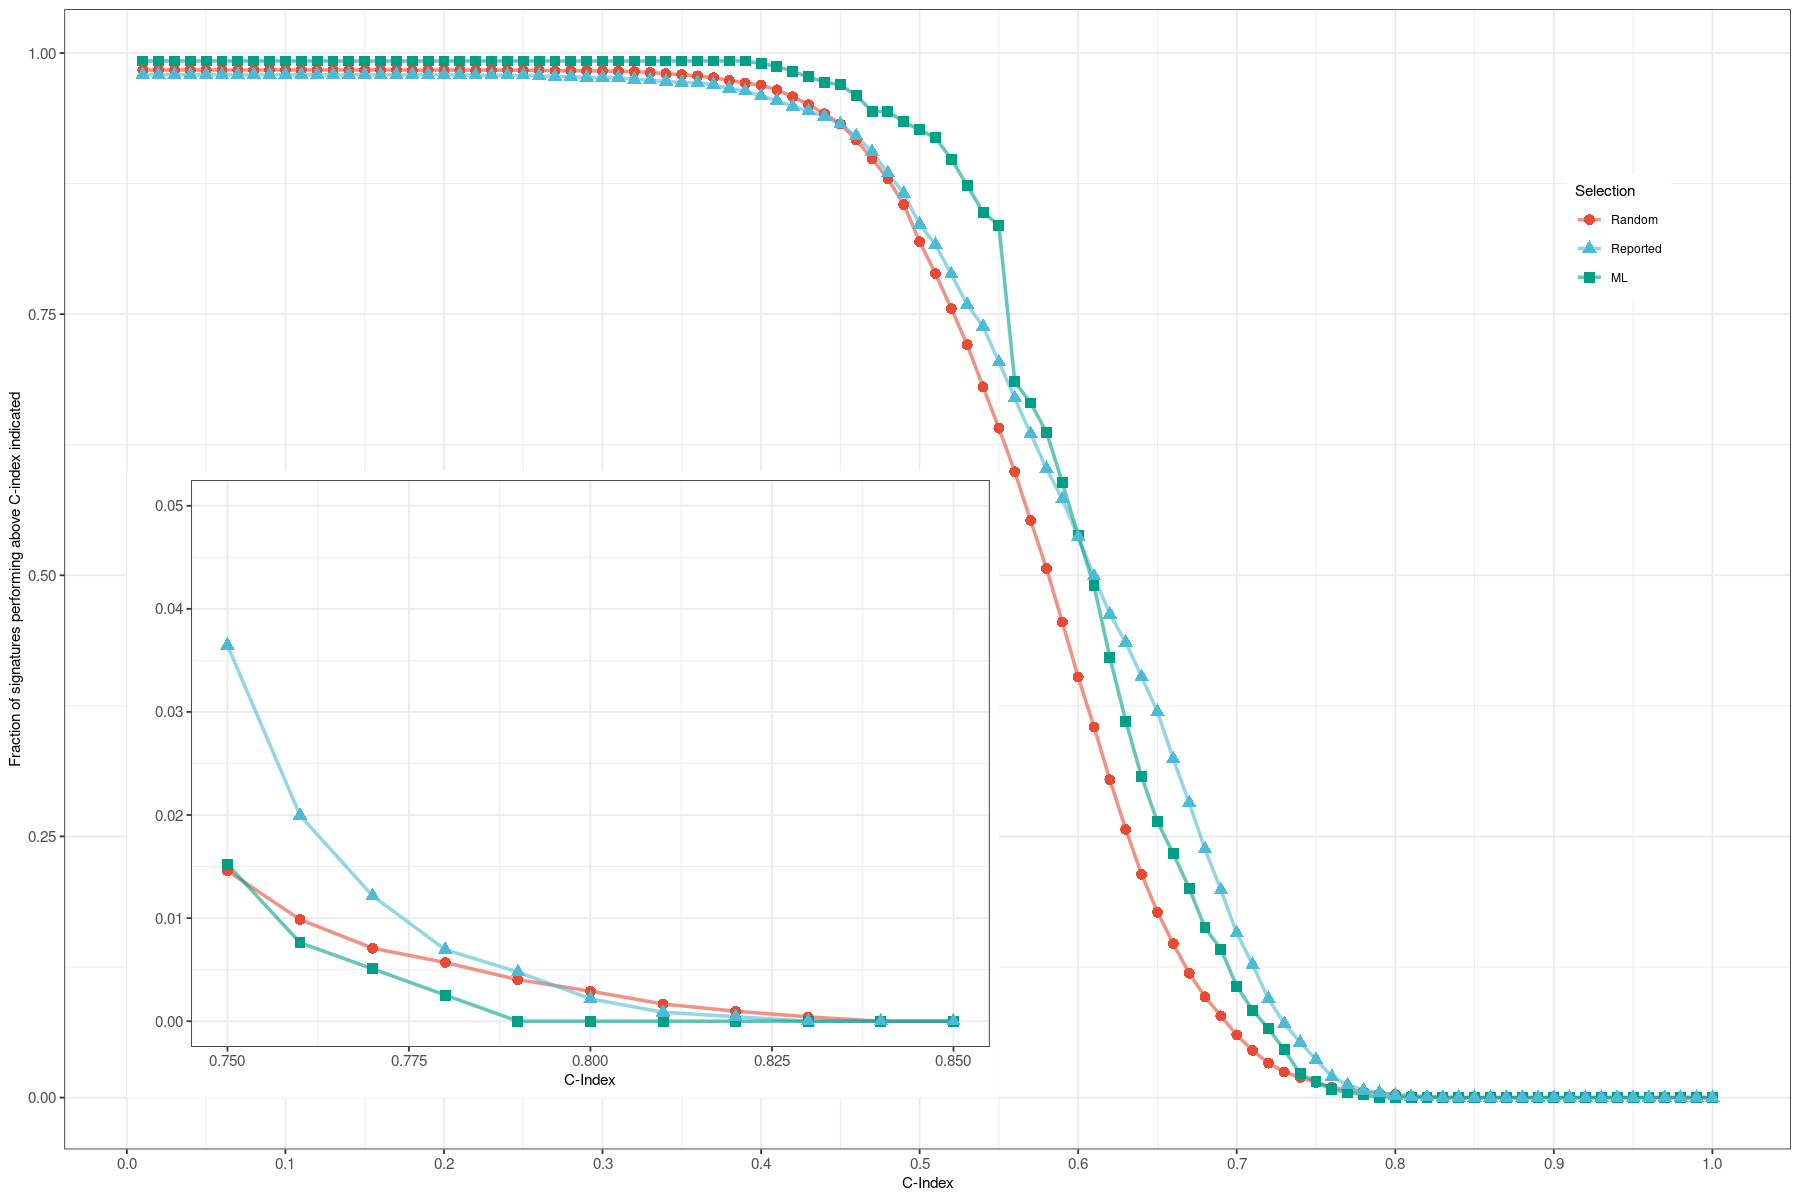

In [39]:
P +
  annotation_custom(
    ggplotGrob(Pinset), 
    xmin = 0.0, xmax = 0.55, ymin = 0.0, ymax = 0.6
  )

In [40]:
ggsave(filename = "percentage.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "percentage.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

# Difference between random and reported signatures

In [281]:
sr = stats_rand[is.na(stats_rand$C_Index)==F,] %>% group_by(Dataset) %>% 
             select(Dataset, Learner, C_Index)
si = stats_sign[is.na(stats_sign$C_Index)==F,] %>% group_by(Dataset) %>% 
             select(Dataset, Learner, C_Index) 

In [282]:
ss= bind_rows(stats_sota)
ss = ss[is.na(ss$C_index)==F,] 
ss$Dataset = sapply(strsplit(ss$file_name, "_"), function(x) x[2]) 
ss$Learner = rename_models(ss$model)
ss$C_Index = ss$C_index
ss= ss %>%
 select(Dataset, Learner, C_Index) %>%
  group_by(Dataset)

In [283]:
head(sr)
head(si)

Dataset,Learner,C_Index
<chr>,<chr>,<dbl>
METABRIC,CoxPH,0.5428935
METABRIC,CoxPH,0.6073137
METABRIC,CoxPH,0.5807699
METABRIC,CoxPH,0.5311607
METABRIC,CoxPH,0.5662516
METABRIC,CoxPH,0.6828416


Dataset,Learner,C_Index
<chr>,<chr>,<dbl>
METABRIC,CoxPH,0.6004034
METABRIC,CoxPH,0.6525083
METABRIC,CoxPH,0.6601291
METABRIC,CoxPH,0.6592735
METABRIC,CoxPH,0.6831656
METABRIC,CoxPH,0.5320137


In [284]:
head(ss)

Dataset,Learner,C_Index
<chr>,<chr>,<dbl>
METABRIC,CoxPH,0.7072102
METABRIC,CoxPH,0.6772900
METABRIC,CoxPH,0.6532634
METABRIC,CoxPH,0.6074353
METABRIC,CoxPH,0.6625526
METABRIC,CoxPH,0.6692297


In [286]:
cindices = bind_rows(sr,si,ss,  .id = "id") 
cindices$id[cindices$id==1]="Random"
cindices$id[cindices$id==2]="Reported"
cindices$id[cindices$id==3]="ML"
cindices$id = factor(cindices$id, levels=c("Random", "Reported", "ML"))

In [287]:
head(cindices)

id,Dataset,Learner,C_Index
<fct>,<chr>,<chr>,<dbl>
Random,METABRIC,CoxPH,0.5428935
Random,METABRIC,CoxPH,0.6073137
Random,METABRIC,CoxPH,0.5807699
Random,METABRIC,CoxPH,0.5311607
Random,METABRIC,CoxPH,0.5662516
Random,METABRIC,CoxPH,0.6828416


In [288]:
#cindices %>% 
#  filter(id %in% c("Random", "Reported")) %>%
#  ggplot(aes(x=C_Index, fill=factor(id))) +
#  geom_histogram(alpha=0.5,col=1)+ facet_wrap(~Dataset)

In [289]:
library(ggpubr)

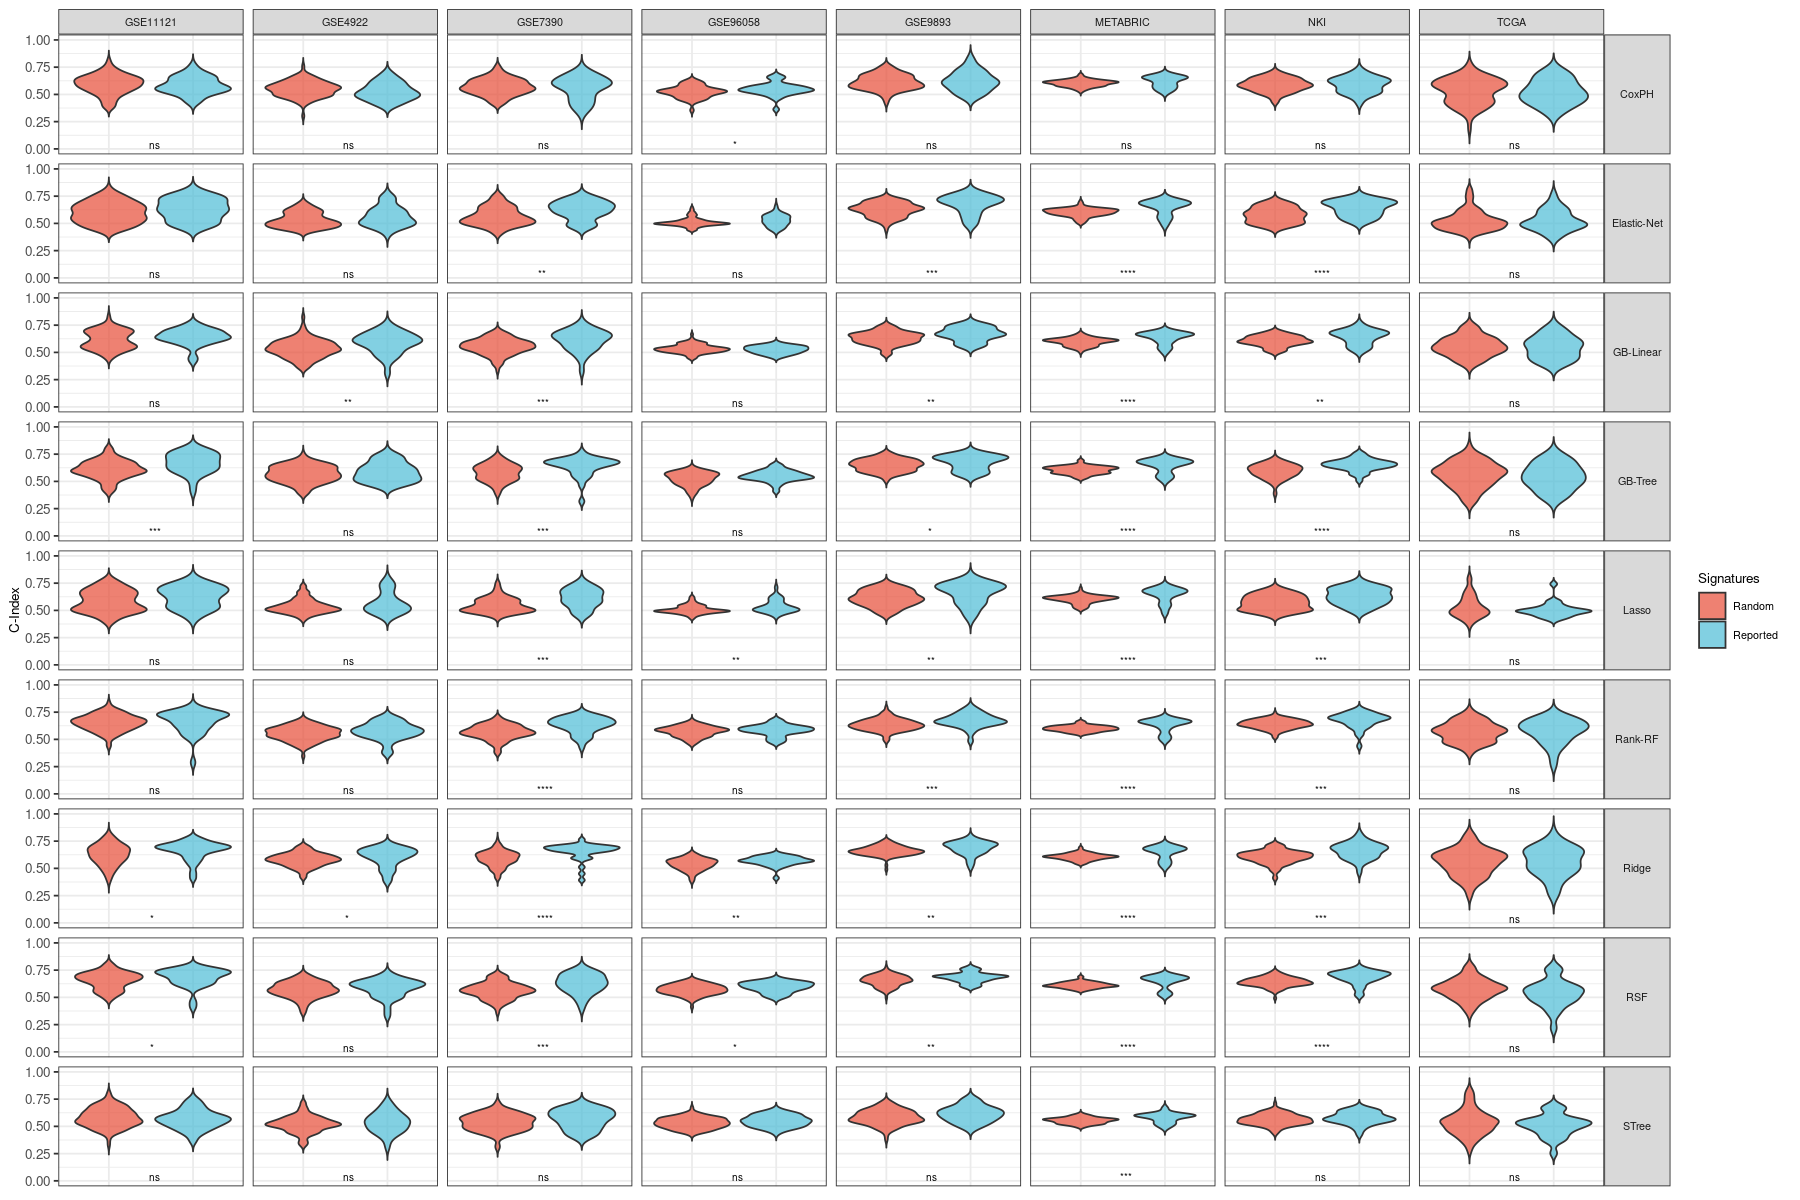

In [327]:
cindices %>% 
  filter(id %in% c("Random", "Reported")) %>%
  ggplot(aes(x=id, y=C_Index, fill=factor(id))) +
#   geom_point(position=position_jitterdodge(),alpha=0.1, size=0.5) +
  geom_violin(trim=FALSE)+
  #geom_boxplot(width=0.1)+
#   geom_boxplot(alpha=0.5,col=1) +
  scale_fill_manual(values = c("#E64B35B2", "#4DBBD5B2")) +
  stat_compare_means(aes(group = id, label = ..p.signif..), label.y=0.0, label.x=1.5,, size=2.1) +
  labs(fill = "Signatures") + 
  ylab("C-Index")+
  ylim(0.0,1.0)+
  theme(
      axis.title.x=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
#       axis.text.x = element_text(family=FONT, size = 26/.pt),
      axis.text.y = element_text(family=FONT, size = 23/.pt),
      text=element_text(family=FONT,          size = 23/.pt)) +
  facet_grid(rows = vars(Learner), cols=vars(Dataset), space = "free")+
  theme(strip.text.y = element_text(angle = 0))

In [328]:
ggsave(filename = "si_diff_rand_reported.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_diff_rand_reported.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

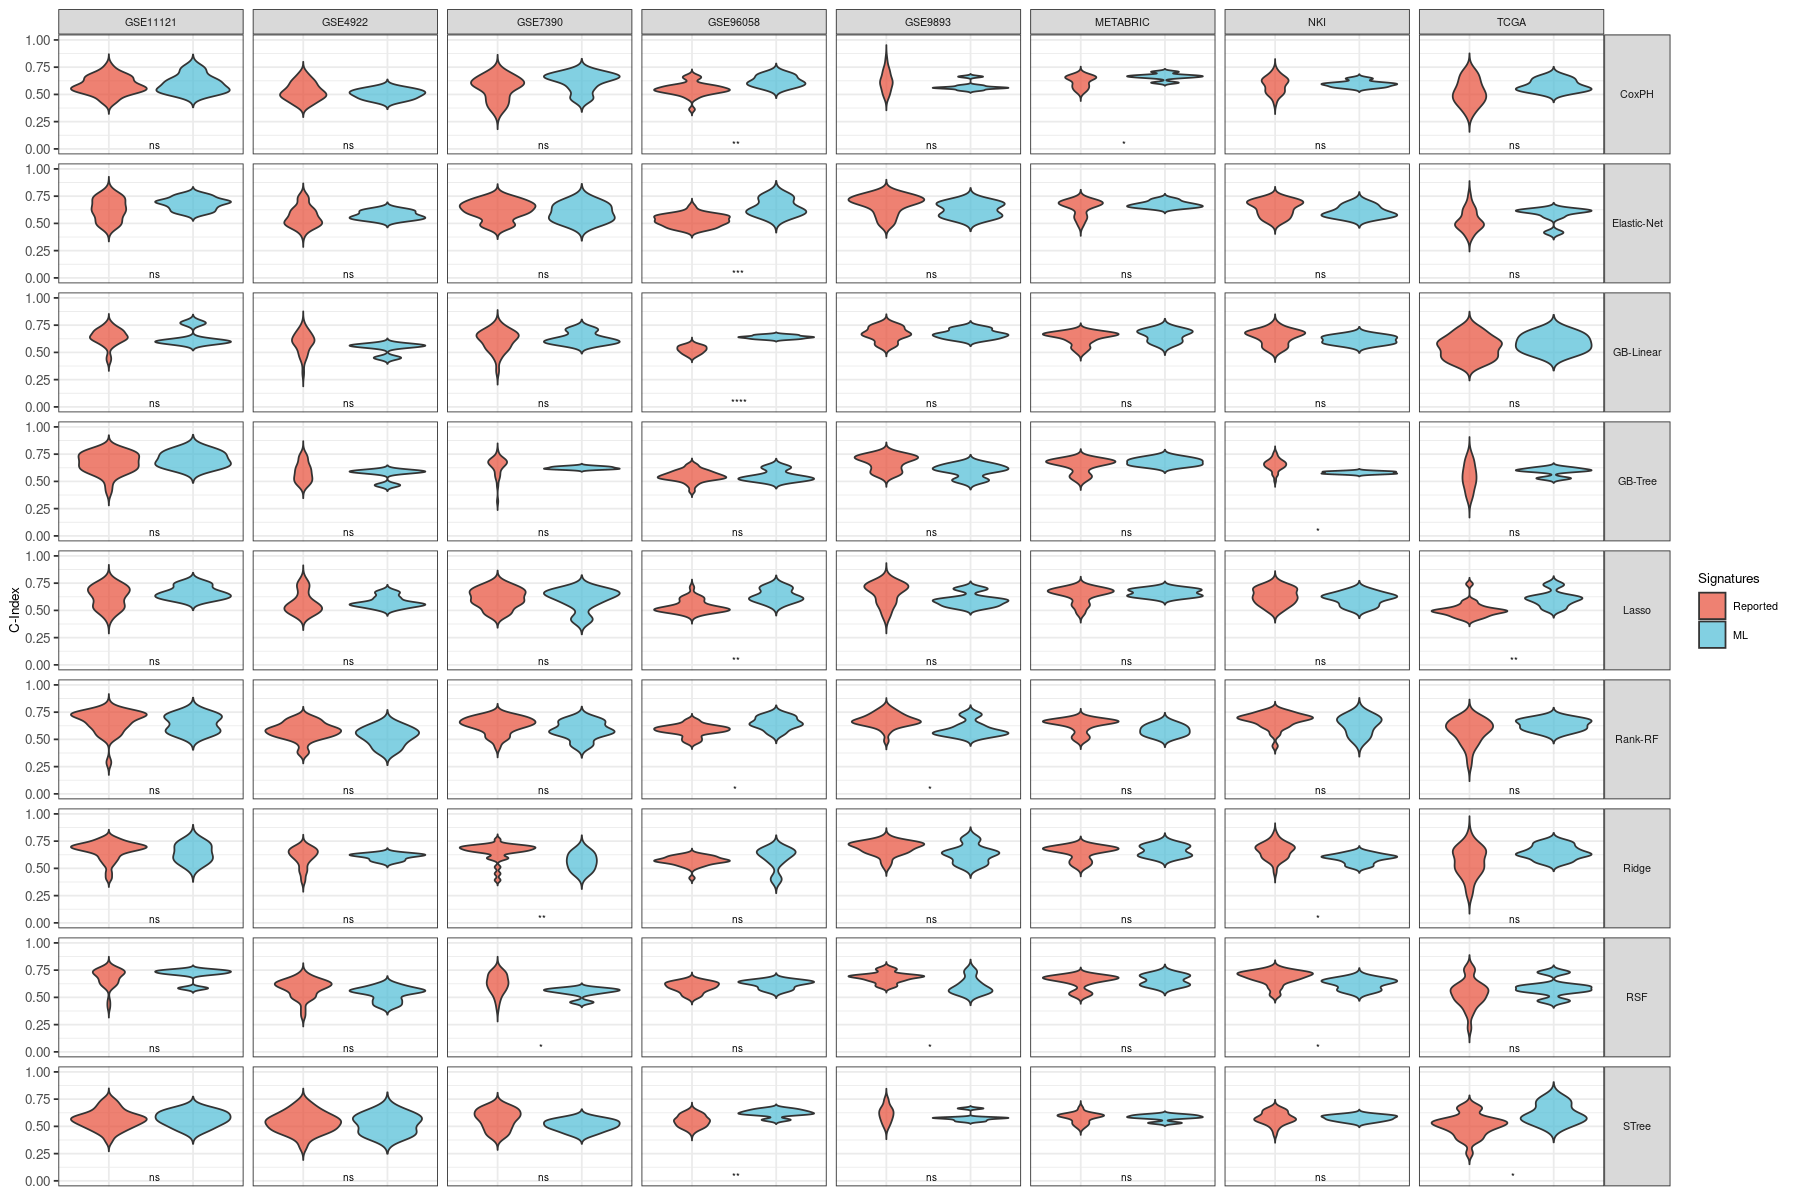

In [332]:
cindices %>% 
  filter(id %in% c("ML", "Reported")) %>%
  ggplot(aes(x=id, y=C_Index, fill=factor(id))) +
#   geom_point(position=position_jitterdodge(),alpha=0.1, size=0.5) +
  geom_violin(trim=FALSE)+
  #geom_boxplot(width=0.1)+
#   geom_boxplot(alpha=0.5,col=1) +
  scale_fill_manual(values = c("#E64B35B2", "#4DBBD5B2")) +
  stat_compare_means(aes(group = id, label = ..p.signif..), label.y=0.0, label.x=1.5,, size=2.1) +
  labs(fill = "Signatures") + 
  ylab("C-Index")+
  ylim(0.0,1.0)+
  theme(
      axis.title.x=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
#       axis.text.x = element_text(family=FONT, size = 26/.pt),
      axis.text.y = element_text(family=FONT, size = 23/.pt),
      text=element_text(family=FONT,          size = 23/.pt)) +
  facet_grid(rows = vars(Learner), cols=vars(Dataset), space = "free")+
  theme(strip.text.y = element_text(angle = 0))

In [334]:
ggsave(filename = "si_diff_reported_ml.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_diff_reported_ml.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

# Difference event type

In [44]:
sr = stats_rand[is.na(stats_rand$C_Index)==F,] 
sr= sr %>%                                      
  group_by(Dataset, Learner) %>%                         
  summarise_at(vars(C_Index),list(Median= median, MAD = mad)) %>% 
   add_column(events = rep(c(23, 26, 26, 53, 29, 164, 52, 17)     , 9)) %>%
   add_column(size =   rep(c(120, 80, 134, 147, 86, 683, 179, 169), 9))
head(sr)
dim(sr)
#plot(sr$event/sqrt(sr$size), sr$MAD)
#plot(sr$event/sqrt(sr$size), sr$Median)

Dataset,Learner,Median,MAD,events,size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSE11121,CoxPH,0.5994035,0.08112721,23,120
GSE11121,Elastic-Net,0.5974024,0.10568727,26,80
GSE11121,GB-Linear,0.6114274,0.10726146,26,134
GSE11121,GB-Tree,0.6018408,0.08450647,53,147
GSE11121,Lasso,0.5788826,0.11695135,29,86
GSE11121,Rank-RF,0.6536986,0.07135027,164,683


[1] 72  6

In [38]:
si = stats_sign[is.na(stats_sign$C_Index)==F,] 
si= si %>%                                      
   group_by(Dataset, Learner) %>%                         
   summarise_at(vars(C_Index),list(Median= median, MAD = mad)) %>% 
   add_column(events = rep(c(23, 26, 26, 53, 29, 164, 52, 17)     , 9)) %>%
   add_column(size =   rep(c(120, 80, 134, 147, 86, 683, 179, 169), 9))
head(si)

Dataset,Learner,Median,MAD,events,size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSE11121,CoxPH,0.5624544,0.07458214,23,120
GSE11121,Elastic-Net,0.6234372,0.15607693,26,80
GSE11121,GB-Linear,0.6359496,0.06748343,26,134
GSE11121,GB-Tree,0.6733657,0.10183621,53,147
GSE11121,Lasso,0.6328853,0.13278495,29,86
GSE11121,Rank-RF,0.7011820,0.07419004,164,683


In [55]:
ss= bind_rows(stats_sota)
ss = ss[is.na(ss$C_index)==F,]
ss$Learner = rename_models(ss$model)
ss$Dataset = sapply(strsplit(ss$file_name, "_"), function(x) x[2]) 
ss= ss %>%                                      
   group_by(Dataset, Learner) %>%                         
   summarise_at(vars(C_index),list(Median= median, MAD = mad)) %>% 
   add_column(events = rep(c(23, 26, 26, 53, 29, 164, 52, 17)     , 9)) %>%
   add_column(size =   rep(c(120, 80, 134, 147, 86, 683, 179, 169), 9))
head(ss)

Dataset,Learner,Median,MAD,events,size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSE11121,CoxPH,0.5797232,0.075936137,23,120
GSE11121,Elastic-Net,0.6983965,0.075475222,26,80
GSE11121,GB-Linear,0.5999470,0.007253249,26,134
GSE11121,GB-Tree,0.6971824,0.078105361,53,147
GSE11121,Lasso,0.6516851,0.052007005,29,86
GSE11121,Rank-RF,0.6481511,0.116102146,164,683


In [70]:
library(ggtext)
library(glue)

In [71]:
highlight = function(x, pat, color="black", family="") {
  ifelse(grepl(pat, x), glue("<b style='font-family:{family}; color:{color}'>{x}</b>"), x)
}

In [154]:
xsize=10
p1 = ggplot(sr, aes(Dataset,Median)) + geom_boxplot() + geom_jitter(shape=16, position=position_jitter(0.2))+
  #ylab("Median C-index")+
  theme(
      plot.title = element_text(size=xsize),
      axis.title.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y = element_text(family=FONT, size = xsize/.pt),
      strip.text.y = element_text(angle = 0))  +
  scale_x_discrete(labels= function(x) highlight(x, "TCGA|GSE96058", "black")) +
                    theme(axis.text.x=element_markdown(size=xsize),
                           axis.text.y=element_markdown(size=xsize),
                         axis.title.y=element_blank())+
                   theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+ggtitle('Random')

p2 = ggplot(si, aes(Dataset,Median)) + geom_boxplot() + geom_jitter(shape=16, position=position_jitter(0.2))+
  ylab("Median of the sample medians")+
  theme(
          plot.title = element_text(size=xsize),
      axis.title.y=element_blank(),
      axis.text.x = element_text(family=FONT, size = xsize/.pt),
      axis.text.y = element_text(family=FONT, size = xsize/.pt),
      strip.text.y = element_text(angle = 0))  +
  scale_x_discrete(labels= function(x) highlight(x, "TCGA|GSE96058", "black")) +
                    theme(axis.text.x=element_markdown(size=xsize),
                           axis.text.y=element_markdown(size=xsize),
                         axis.title.y=element_markdown(size=xsize))+
                   theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+ggtitle('Reported')

p3 = ggplot(ss, aes(Dataset,Median)) + geom_boxplot() + geom_jitter(shape=16, position=position_jitter(0.2))+
  #ylab("Median C-index")+
  theme(
            plot.title = element_text(size=xsize),
      axis.title.x=element_blank(),
      axis.text.x = element_text(family=FONT, size = xsize/.pt),
      axis.text.y = element_text(family=FONT, size = xsize/.pt),
      strip.text.y = element_text(angle = 0))  +
  scale_x_discrete(labels= function(x) highlight(x, "TCGA|GSE96058", "black")) +
                    theme(axis.text.x=element_markdown(size=xsize),
                          axis.text.y=element_markdown(size=xsize),
                         axis.title.y=element_blank())+ggtitle('ML')


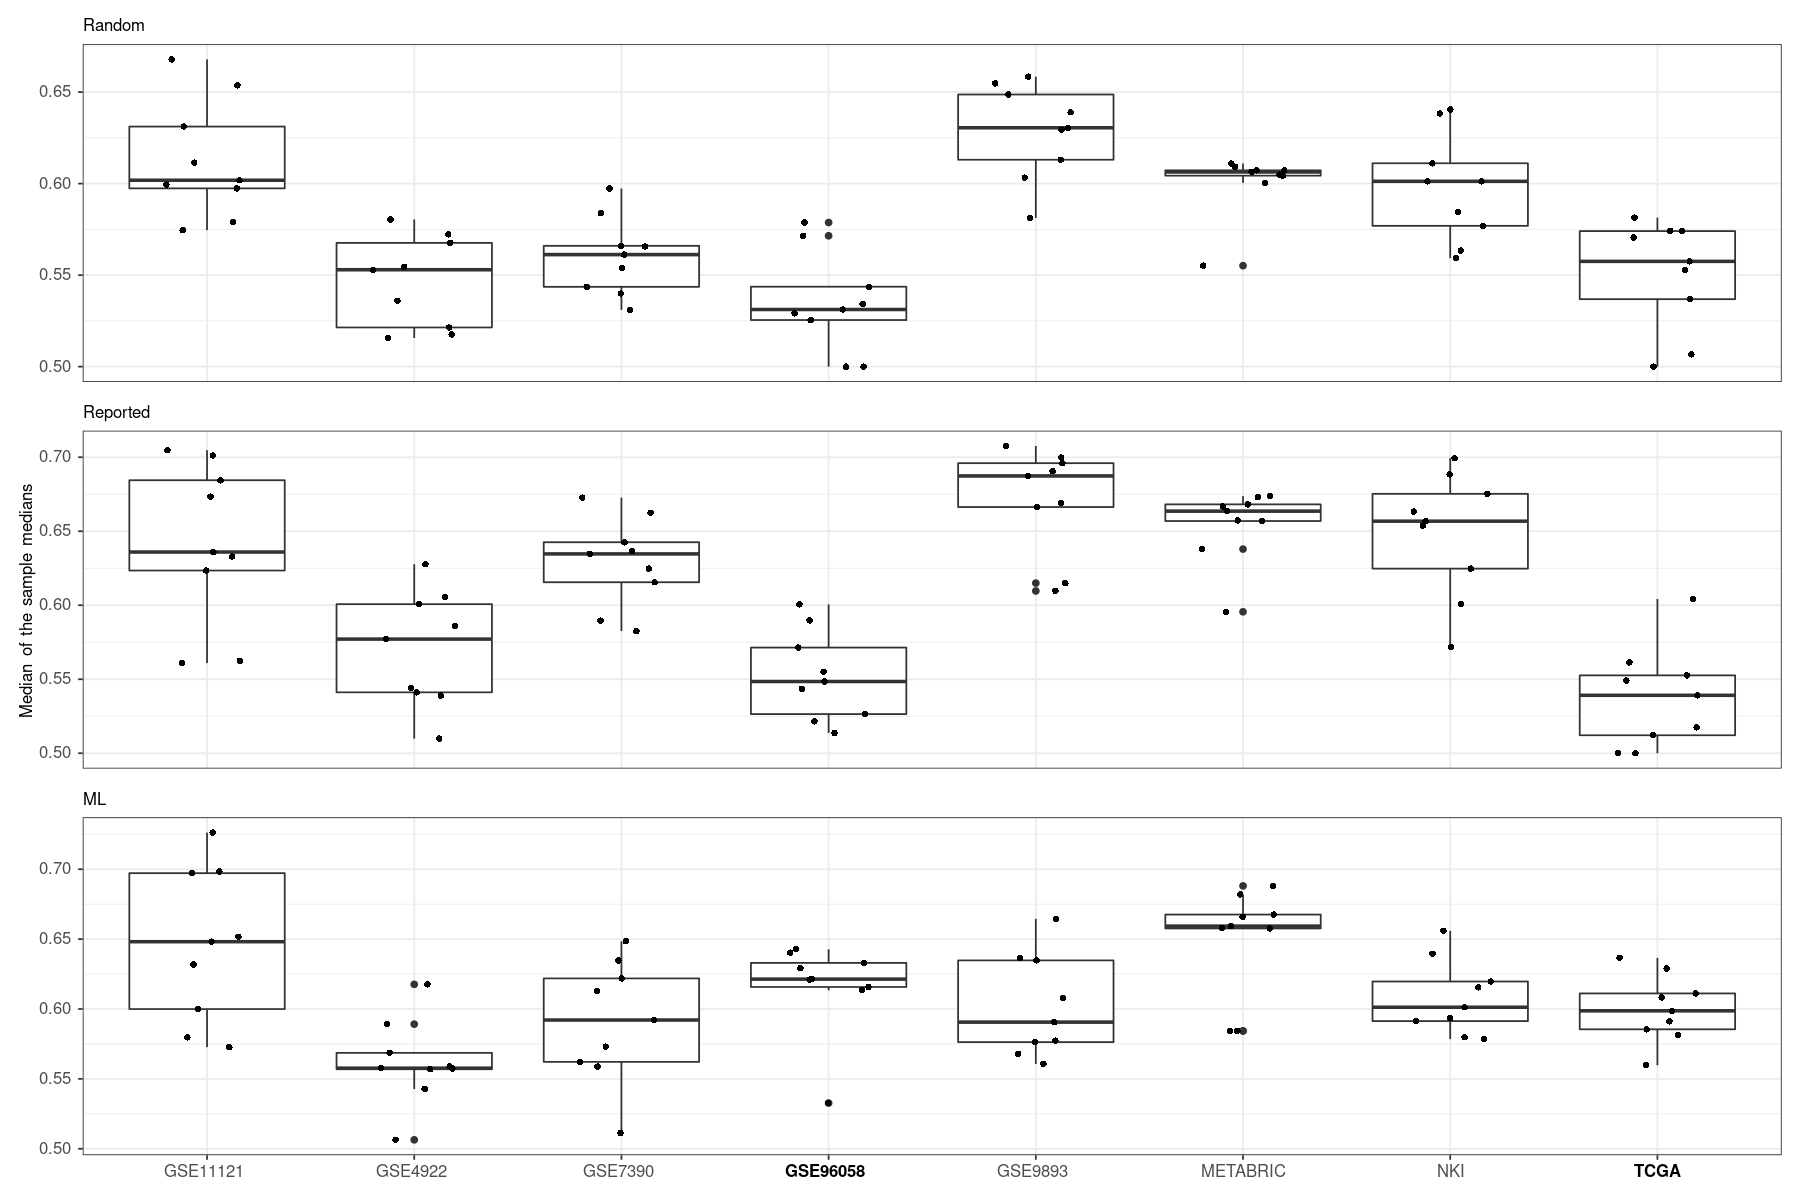

In [155]:
ppp = p1 / p2 / p3
ppp

In [156]:
ggsave(filename = "si_event_type_diff.tiff", path = path, width = 17.8, height = 17.8*(3/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_event_type_diff.png",  path = path, width = 17.8, height = 17.8*(3/3), units = "cm", device='png',  dpi=700)

# Dependence on the number of event and dataset size

In [9]:
library(ggpubr)

In [11]:
library(matrixStats)
library(spatstat)

In [31]:
sr = stats_rand[is.na(stats_rand$C_Index)==F,] 
sr= sr %>%                                      
  group_by(Dataset, Learner) %>%                         
  summarise_at(vars(C_Index),list(Median= median, MAD = mad)) %>% 
   add_column(events = rep(c(23, 26, 26, 53, 29, 164, 52, 17)     , 9)) %>%
   add_column(size =   rep(c(120, 80, 134, 147, 86, 683, 179, 169), 9))
head(sr)
dim(sr)
#plot(sr$event/sqrt(sr$size), sr$MAD)
#plot(sr$event/sqrt(sr$size), sr$Median)

Dataset,Learner,Median,MAD,events,size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSE11121,CoxPH,0.5994035,0.08112721,23,120
GSE11121,Elastic-Net,0.5974024,0.10568727,26,80
GSE11121,GB-Linear,0.6114274,0.10726146,26,134
GSE11121,GB-Tree,0.6018408,0.08450647,53,147
GSE11121,Lasso,0.5788826,0.11695135,29,86
GSE11121,Rank-RF,0.6536986,0.07135027,164,683


[1] 72  6

In [202]:
si = stats_sign[is.na(stats_sign$C_Index)==F,] 
si= si %>%                                      
   group_by(Dataset, Learner) %>%                         
   summarise_at(vars(C_Index),list(Median= median, MAD = mad)) %>% 
   add_column(events = rep(c(23, 26, 26, 53, 29, 164, 52, 17)     , 9)) %>%
   add_column(size =   rep(c(120, 80, 134, 147, 86, 683, 179, 169), 9))
head(si)

Dataset,Learner,Median,MAD,events,size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSE11121,CoxPH,0.5624544,0.07458214,23,120
GSE11121,Elastic-Net,0.6234372,0.15607693,26,80
GSE11121,GB-Linear,0.6359496,0.06748343,26,134
GSE11121,GB-Tree,0.6733657,0.10183621,53,147
GSE11121,Lasso,0.6328853,0.13278495,29,86
GSE11121,Rank-RF,0.7011820,0.07419004,164,683


In [203]:
ss= bind_rows(stats_sota)
ss = ss[is.na(ss$C_index)==F,]
ss$Learner = rename_models(ss$model)
ss$Dataset = sapply(strsplit(ss$file_name, "_"), function(x) x[2]) 
ss= ss %>%                                      
   group_by(Dataset, Learner) %>%                         
   summarise_at(vars(C_index),list(Median= median, MAD = mad)) %>% 
   add_column(events = rep(c(23, 26, 26, 53, 29, 164, 52, 17)     , 9)) %>%
   add_column(size =   rep(c(120, 80, 134, 147, 86, 683, 179, 169), 9))
head(ss)

Dataset,Learner,Median,MAD,events,size
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GSE11121,CoxPH,0.5797232,0.075936137,23,120
GSE11121,Elastic-Net,0.6983965,0.075475222,26,80
GSE11121,GB-Linear,0.5999470,0.007253249,26,134
GSE11121,GB-Tree,0.6971824,0.078105361,53,147
GSE11121,Lasso,0.6516851,0.052007005,29,86
GSE11121,Rank-RF,0.6481511,0.116102146,164,683


In [229]:
dfs = bind_rows(list(sr, si, ss), .id = "id")
dfs$id[dfs$id=="1"] = "Random"
dfs$id[dfs$id=="2"] = "Reported"
dfs$id[dfs$id=="3"] = "ML"
dfs$id = factor(dfs$id, levels=c("Random", "Reported", "ML"))

In [230]:
head(dfs)

id,Dataset,Learner,Median,MAD,events,size
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Random,GSE11121,CoxPH,0.5994035,0.08112721,23,120
Random,GSE11121,Elastic-Net,0.5974024,0.10568727,26,80
Random,GSE11121,GB-Linear,0.6114274,0.10726146,26,134
Random,GSE11121,GB-Tree,0.6018408,0.08450647,53,147
Random,GSE11121,Lasso,0.5788826,0.11695135,29,86
Random,GSE11121,Rank-RF,0.6536986,0.07135027,164,683


In [250]:
P1 = ggplot(dfs, aes(x=size, y=MAD)) + 
   geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=2,
                 stroke = 0.5
                )+
  scale_x_continuous(trans='log10')+
  stat_cor(method = "spearman", label.x.npc = "middle",label.y.npc = "bottom", size=2.2) +
  xlab("Number of subjects")+
  ylab("Median absolute deviation")+
#   expand_limits(y = c(0.5, 1.2))  
  theme(
      axis.text.x = element_text(family=FONT, size = 23/.pt),
      axis.text.y = element_text(family=FONT, size = 23/.pt),
      text=element_text(family=FONT,          size = 23/.pt))+
  facet_grid(rows = vars(Learner), cols = vars(id), space = "free")+
  theme(strip.text.y = element_text(angle = 0))
# P1

In [251]:
ggsave(filename = "si_mad_nos.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_mad_nos.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

In [257]:
P2 = ggplot(dfs, aes(x=events/size, y=MAD)) + 
   geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=2,
                 stroke = 0.5
                )+
  scale_x_continuous(trans='log10')+
  stat_cor(method = "spearman", label.x.npc = "left",label.y.npc = "top", size=2.2) +
  xlab("Event rate")+
  ylab("Median absolute deviation")+
#   expand_limits(y = c(0.5, 1.2))  
  theme(
      axis.text.x = element_text(family=FONT, size = 23/.pt),
      axis.text.y = element_text(family=FONT, size = 23/.pt),
      text=element_text(family=FONT,          size = 23/.pt))+
  facet_grid(rows = vars(Learner), cols = vars(id), space = "free")+
  theme(strip.text.y = element_text(angle = 0))

In [258]:
ggsave(filename = "si_mad_er.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_mad_er.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

In [266]:
P3 = ggplot(dfs, aes(x=size, y=Median)) + 
   geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=2,
                 stroke = 0.5
                )+
  scale_x_continuous(trans='log10')+
  stat_cor(method = "spearman", label.x.npc = "middle",label.y.npc = "top", size=2.2) +
  xlab("Number of subjects")+
  ylab("Median of the sample medians")+
#   expand_limits(y = c(0.5, 1.2))  
    theme(
      axis.text.x = element_text(family=FONT, size = 23/.pt),
      axis.text.y = element_text(family=FONT, size = 20/.pt),
      text=element_text(family=FONT,          size = 23/.pt))+
  facet_grid(rows = vars(Learner), cols = vars(id), space = "free")+
  theme(strip.text.y = element_text(angle = 0))

In [267]:
ggsave(filename = "si_mom_nus.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_mom_nus.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

In [268]:
P4 = ggplot(dfs, aes(x=events/size, y=Median)) + 
   geom_point(color=rgb(0, 101, 165, maxColorValue=255), 
                 fill=rgb(205, 217, 235, maxColorValue=255),
                 pch=21, 
                 size=2,
                 stroke = 0.5
                )+
  scale_x_continuous(trans='log10')+
  stat_cor(method = "spearman", label.x.npc = "left",label.y.npc = "top", size=2.2) +
  xlab("Event rate")+
  ylab("Median of the sample medians")+
#   expand_limits(y = c(0.5, 1.2))  
      theme(
      axis.text.x = element_text(family=FONT, size = 23/.pt),
      axis.text.y = element_text(family=FONT, size = 20/.pt),
      text=element_text(family=FONT,          size = 23/.pt))+
  facet_grid(rows = vars(Learner), cols = vars(id), space = "free")+
  theme(strip.text.y = element_text(angle = 0))

In [269]:
ggsave(filename = "si_mom_er.tiff", path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='tiff', dpi=700)
ggsave(filename = "si_mom_er.png",  path = path, width = 17.8, height = 17.8*(2/3), units = "cm", device='png',  dpi=700)

# Additonal: NN

In [282]:
library("survival")
library("survminer")

Warning message:
“package ‘survival’ was built under R version 4.1.1”
Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:egg’:

    ggarrange



Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [283]:
df = stats_rand

In [284]:
df = df[df$Dataset=="METABRIC",]

In [285]:
head(df)

,Dataset,Selection,Learner,C_Index
,<chr>,<int>,<chr>,<dbl>
1,METABRIC,1,CoxPH,0.5428935
2,METABRIC,2,CoxPH,0.6073137
3,METABRIC,3,CoxPH,0.5807699
4,METABRIC,4,CoxPH,0.5311607
5,METABRIC,5,CoxPH,0.5662516
6,METABRIC,6,CoxPH,0.6828416


In [310]:
tmp = df[df$Learner=="CoxPH",]

In [311]:
tmp[tmp$C_Index==max(tmp$C_Index, na.rm = TRUE),]

,Dataset,Selection,Learner,C_Index
,<chr>,<int>,<chr>,<dbl>
6,METABRIC,6,CoxPH,0.6828416


In [417]:
rds = readRDS("../data/dfs_random.rds")[[1]]

In [418]:
ds = rds[[6]]

In [419]:
dim(ds)

[1] 683  22

In [420]:
genes = names(ds)[3:22]

In [421]:
genes

[1] "LINC00161" "ADGRA2"    "CUL9"      "IER3"      "ASH1LAS1"  "MAG"      
 [7] "STK17A"    "MAPKAPK5"  "KLF6"      "SFSWAP"    "EPB41L5"   "LARP1"    
[13] "SP7"       "MARF1"     "POLE3"     "OR5K2"     "BMF"       "VSIG8"    
[19] "LAIR1"     "ST3GAL3"

## Get clinical data

In [429]:
source("00_functions.R")

In [408]:
platform = readRDS("../../platform/database/platform.rds")

In [409]:
print(platform)

# A tibble: 22 x 3
   dataset      clinical_data            expression_data              
   <chr>        <list>                   <list>                       
 1 ExprImageRaw <df[,134] [311 × 134]>   <df[,134] [311 × 134]>       
 2 ExprImageFil <df[,134] [152 × 134]>   <df[,134] [152 × 134]>       
 3 METABRIC     <df[,52] [2,136 × 52]>   <df[,48803] [2,136 × 48,803]>
 4 GSE11121     <df[,64] [200 × 64]>     <df[,12403] [200 × 12,403]>  
 5 GSE19615     <df[,78] [115 × 78]>     <df[,20175] [115 × 20,175]>  
 6 GSE22226A    <df[,31] [129 × 31]>     <df[,41000] [129 × 41,000]>  
 7 GSE22226B    <df[,31] [20 × 31]>      <df[,41000] [20 × 41,000]>   
 8 GSE26971     <df[,94] [146 × 94]>     <df[,12400] [146 × 12,400]>  
 9 GSE96058     <df[,113] [3,273 × 113]> <df[,30865] [3,273 × 30,865]>
10 GSE1456A     <df[,63] [159 × 63]>     <df[,12400] [159 × 12,400]>  
# … with 12 more rows


In [430]:
expr = filter_and_annotate_mb(platform$expression_data[[3]])
dim(expr)

Warning message in rowsum.default(x, ID, reorder = FALSE, na.rm = TRUE):
“missing values for 'group'”
Warning message in rowsum.default(1L - is.na(x), ID, reorder = FALSE):
“missing values for 'group'”


[1]  2136 19222

In [436]:
genes[5] = 'ASH1L-AS1'

In [458]:
E = expr[,genes]

In [459]:
dim(E)

[1] 2136   20

In [460]:
C = platform$clinical_data[[3]]
dim(C)

[1] 2136   52

In [462]:
table(C$Patient.s.Vital.Status)


     Died of Disease Died of Other Causes               Living 
                 646                  497                  837 

In [464]:
C = subset(C, C$Patient.s.Vital.Status!="Died of Other Causes")
dim(C)

[1] 1483   52

In [529]:
survival_time = C$Overall.Survival..Months.
event = ifelse(C$Overall.Survival.Status=="0:LIVING", 0, 1)

In [530]:
NPI = C$Nottingham.prognostic.index
Age = C$Age.at.Diagnosis

In [531]:
table(C$Overall.Survival.Status)


  0:LIVING 1:DECEASED 
       837        646 

In [532]:
names(C)

[1] "node_status"                    "grade"                         
 [3] "tumor_size"                     "survival_time"                 
 [5] "event"                          "age"                           
 [7] "chemo"                          "hormonal"                      
 [9] "radiation"                      "stage"                         
[11] "ER"                             "PR"                            
[13] "HER2"                           "Study.ID"                      
[15] "Patient.ID"                     "Sample.ID"                     
[17] "Age.at.Diagnosis"               "Type.of.Breast.Surgery"        
[19] "Cancer.Type"                    "Cancer.Type.Detailed"          
[21] "Cellularity"                    "Chemotherapy"                  
[23] "Pam50...Claudin.low.subtype"    "Cohort"                        
[25] "ER.status.measured.by.IHC"      "ER.Status"                     
[27] "Neoplasm.Histologic.Grade"      "HER2.status.measured.by.SNP6"  
[29] "HER2.Status"                    "Tumor.Other.Histologic.Subtype"
[31] "Hormone.Therapy"                "Inferred.Menopausal.State"     
[33] "Integrative.Cluster"            "Primary.Tumor.Laterality"      
[35] "Lymph.nodes.examined.positive"  "Mutation.Count"                
[37] "Nottingham.prognostic.index"    "Oncotree.Code"                 
[39] "Overall.Survival..Months."      "Overall.Survival.Status"       
[41] "PR.Status"                      "Radio.Therapy"                 
[43] "Relapse.Free.Status..Months."   "Relapse.Free.Status"           
[45] "Number.of.Samples.Per.Patient"  "Sample.Type"                   
[47] "Sex"                            "X3.Gene.classifier.subtype"    
[49] "Tumor.Size"                     "Tumor.Stage"                   
[51] "Patient.s.Vital.Status"         "study_id"

In [533]:
clin = data.frame(survival_time = survival_time,
                  event = event,
                  NPI = NPI,
                  Age = Age
                 )

In [534]:
data = cbind(clin, E[rownames(clin),])
# colnames(data) = c(colnames(ds), "NPI", "Age")

In [535]:
# library(rms)
#library(caret)

In [536]:
head(data)

,survival_time,event,NPI,Age,LINC00161,ADGRA2,CUL9,IER3,ASH1L-AS1,MAG,⋯,EPB41L5,LARP1,SP7,MARF1,POLE3,OR5K2,BMF,VSIG8,LAIR1,ST3GAL3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47.03333,1,4.036,52.79,5.500124,8.427873,6.243935,10.009701,5.479917,5.484220,⋯,6.570182,6.691504,5.507494,9.349287,9.358000,5.110764,5.429831,5.447648,10.174264,6.378693
2,20.43333,1,6.032,32.61,5.496013,6.634077,5.821377,8.727219,5.367033,5.653028,⋯,6.928955,6.418488,5.517282,9.778080,10.865823,5.666469,5.876275,5.351856,9.894796,6.513556
3,138.13333,0,6.030,66.83,5.200522,6.288388,5.914558,10.226054,5.598548,5.422930,⋯,6.141083,6.321104,5.247399,9.137489,10.064907,5.356458,5.800679,5.402639,9.916997,5.832237
4,119.80000,0,5.042,71.21,5.417428,6.316304,5.912543,9.523349,5.542687,5.775274,⋯,6.454759,6.449231,5.478217,9.142364,9.827917,5.704746,5.741167,5.384126,10.037480,5.847648
5,43.83333,1,5.100,76.84,5.477788,6.034006,6.363692,10.120560,5.442459,5.249036,⋯,6.632381,6.673013,5.018276,9.844655,10.277357,5.542275,5.912113,5.515954,10.387229,6.031917
6,101.23333,0,3.046,60.77,5.373217,6.809880,6.110811,9.516021,5.459129,5.556396,⋯,6.286297,6.786085,5.414395,9.264443,10.140423,5.231269,5.654277,5.635212,10.291870,6.150062


In [537]:
names(data)[9] = 'ASH1LAS1' 

In [538]:
# data = data[, 1:22]

In [539]:
fS = Surv(survival_time, event) ~.
features = colnames(data)[3:length(colnames(data))]
features = gsub("[^[:alnum:]]", "", features)
fs = reformulate(features, fS[[2]])

In [540]:
head(data)

,survival_time,event,NPI,Age,LINC00161,ADGRA2,CUL9,IER3,ASH1LAS1,MAG,⋯,EPB41L5,LARP1,SP7,MARF1,POLE3,OR5K2,BMF,VSIG8,LAIR1,ST3GAL3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47.03333,1,4.036,52.79,5.500124,8.427873,6.243935,10.009701,5.479917,5.484220,⋯,6.570182,6.691504,5.507494,9.349287,9.358000,5.110764,5.429831,5.447648,10.174264,6.378693
2,20.43333,1,6.032,32.61,5.496013,6.634077,5.821377,8.727219,5.367033,5.653028,⋯,6.928955,6.418488,5.517282,9.778080,10.865823,5.666469,5.876275,5.351856,9.894796,6.513556
3,138.13333,0,6.030,66.83,5.200522,6.288388,5.914558,10.226054,5.598548,5.422930,⋯,6.141083,6.321104,5.247399,9.137489,10.064907,5.356458,5.800679,5.402639,9.916997,5.832237
4,119.80000,0,5.042,71.21,5.417428,6.316304,5.912543,9.523349,5.542687,5.775274,⋯,6.454759,6.449231,5.478217,9.142364,9.827917,5.704746,5.741167,5.384126,10.037480,5.847648
5,43.83333,1,5.100,76.84,5.477788,6.034006,6.363692,10.120560,5.442459,5.249036,⋯,6.632381,6.673013,5.018276,9.844655,10.277357,5.542275,5.912113,5.515954,10.387229,6.031917
6,101.23333,0,3.046,60.77,5.373217,6.809880,6.110811,9.516021,5.459129,5.556396,⋯,6.286297,6.786085,5.414395,9.264443,10.140423,5.231269,5.654277,5.635212,10.291870,6.150062


In [541]:
fs

Surv(survival_time, event) ~ NPI + Age + LINC00161 + ADGRA2 + 
    CUL9 + IER3 + ASH1LAS1 + MAG + STK17A + MAPKAPK5 + KLF6 + 
    SFSWAP + EPB41L5 + LARP1 + SP7 + MARF1 + POLE3 + OR5K2 + 
    BMF + VSIG8 + LAIR1 + ST3GAL3

In [542]:
cox = cph(formula = fs, 
           data = data, 
           x = T, 
           y = T
         )

In [543]:
cv_version <- validate(fit =  cox, method = "crossvalidation", B = 5)
train_CV_C <- (cv_version[1, 3] + 1)/2
round(train_CV_C, 4) 

[1] 0.6585